### 데이터 전처리

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import matplotlib

cust_df = pd.read_csv("./data.csv",encoding='latin-1')
print('dataset shape:', cust_df.shape)
cust_df.head(3)

dataset shape: (76020, 371)


,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.17,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.03,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.77,0


In [2]:
cust_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76020 entries, 0 to 76019
Columns: 371 entries, ID to TARGET
dtypes: float64(111), int64(260)
memory usage: 215.2 MB


In [3]:
print(cust_df['TARGET'].value_counts())
unsatisfied_cnt = cust_df[cust_df['TARGET'] == 1].TARGET.count()
total_cnt = cust_df.TARGET.count()
print('unsatisfied 비율은 {0:.2f}'.format((unsatisfied_cnt / total_cnt)))

0    73012
1     3008
Name: TARGET, dtype: int64
unsatisfied 비율은 0.04


In [4]:
cust_df.describe( )

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
count,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,...,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,76020.000000,7.602000e+04,76020.000000
mean,75964.050723,-1523.199277,33.212865,86.208265,72.363067,119.529632,3.559130,6.472698,0.412946,0.567352,...,7.935824,1.365146,12.215580,8.784074,31.505324,1.858575,76.026165,56.614351,1.172358e+05,0.039569
std,43781.947379,39033.462364,12.956486,1614.757313,339.315831,546.266294,93.155749,153.737066,30.604864,36.513513,...,455.887218,113.959637,783.207399,538.439211,2013.125393,147.786584,4040.337842,2852.579397,1.826646e+05,0.194945
min,1.000000,-999999.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.163750e+03,0.000000
25%,38104.750000,2.000000,23.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.787061e+04,0.000000
50%,76043.000000,2.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.064092e+05,0.000000
75%,113748.750000,2.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.187563e+05,0.000000
max,151838.000000,238.000000,105.000000,210000.000000,12888.030000,21024.810000,8237.820000,11073.570000,6600.000000,6600.000000,...,50003.880000,20385.720000,138831.630000,91778.730000,438329.220000,24650.010000,681462.900000,397884.300000,2.203474e+07,1.000000


In [5]:
# var3 피처 값 대체 및 ID 피처 드롭
cust_df['var3'].replace(-999999,2, inplace=True)
cust_df.drop('ID',axis=1 , inplace=True)

# 피처 세트와 레이블 세트분리. 레이블 컬럼은 DataFrame의 맨 마지막에 위치해 컬럼 위치 -1로 분리
X_features = cust_df.iloc[:, :-1]
y_labels = cust_df.iloc[:, -1]
print('피처 데이터 shape:{0}'.format(X_features.shape))


피처 데이터 shape:(76020, 369)


In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_features, y_labels,
                                                    test_size=0.2, random_state=0)
train_cnt = y_train.count()
test_cnt = y_test.count()
print('학습 세트 Shape:{0}, 테스트 세트 Shape:{1}'.format(X_train.shape , X_test.shape))

print(' 학습 세트 레이블 값 분포 비율')
print(y_train.value_counts()/train_cnt)
print('\n 테스트 세트 레이블 값 분포 비율')
print(y_test.value_counts()/test_cnt)

학습 세트 Shape:(60816, 369), 테스트 세트 Shape:(15204, 369)
 학습 세트 레이블 값 분포 비율
0    0.960964
1    0.039036
Name: TARGET, dtype: float64

 테스트 세트 레이블 값 분포 비율
0    0.9583
1    0.0417
Name: TARGET, dtype: float64


### XGBoost 모델 학습과 하이퍼 파라미터 튜닝

In [7]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score

# n_estimators는 500으로, random state는 예제 수행 시마다 동일 예측 결과를 위해 설정. 
xgb_clf = XGBClassifier(n_estimators=500, random_state=156)

# 성능 평가 지표를 auc로, 조기 중단 파라미터는 100으로 설정하고 학습 수행. 
xgb_clf.fit(X_train, y_train, early_stopping_rounds=100,
            eval_metric="auc", eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))



[0]	validation_0-auc:0.799928	validation_1-auc:0.803548
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 100 rounds.
[1]	validation_0-auc:0.802222	validation_1-auc:0.805222
[2]	validation_0-auc:0.80819	validation_1-auc:0.813162
[3]	validation_0-auc:0.8127	validation_1-auc:0.813243
[4]	validation_0-auc:0.81648	validation_1-auc:0.816979
[5]	validation_0-auc:0.816018	validation_1-auc:0.816629
[6]	validation_0-auc:0.816474	validation_1-auc:0.817776
[7]	validation_0-auc:0.818148	validation_1-auc:0.818464
[8]	validation_0-auc:0.81806	validation_1-auc:0.818295
[9]	validation_0-auc:0.817039	validation_1-auc:0.818087
[10]	validation_0-auc:0.818318	validation_1-auc:0.818749
[11]	validation_0-auc:0.818711	validation_1-auc:0.818521
[12]	validation_0-auc:0.818673	validation_1-auc:0.818516
[13]	validation_0-auc:0.819156	validation_1-auc:0.818998
[14]	validation_0-auc:0.819847	validation_1-auc:0.81999
[15

[142]	validation_0-auc:0.861553	validation_1-auc:0.841335
[143]	validation_0-auc:0.861682	validation_1-auc:0.841346
[144]	validation_0-auc:0.86169	validation_1-auc:0.841403
[145]	validation_0-auc:0.861852	validation_1-auc:0.841299
[146]	validation_0-auc:0.861898	validation_1-auc:0.841301
[147]	validation_0-auc:0.861998	validation_1-auc:0.841289
[148]	validation_0-auc:0.862068	validation_1-auc:0.84135
[149]	validation_0-auc:0.862132	validation_1-auc:0.841444
[150]	validation_0-auc:0.862236	validation_1-auc:0.841409
[151]	validation_0-auc:0.862314	validation_1-auc:0.841459
[152]	validation_0-auc:0.862584	validation_1-auc:0.841456
[153]	validation_0-auc:0.862843	validation_1-auc:0.841483
[154]	validation_0-auc:0.863033	validation_1-auc:0.841493
[155]	validation_0-auc:0.863132	validation_1-auc:0.841534
[156]	validation_0-auc:0.863423	validation_1-auc:0.841728
[157]	validation_0-auc:0.863578	validation_1-auc:0.841712
[158]	validation_0-auc:0.863872	validation_1-auc:0.841677
[159]	validation

In [8]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
xgb_clf = XGBClassifier(n_estimators=100)

params = {'max_depth':[5, 7] , 'min_child_weight':[1,3] ,'colsample_bytree':[0.5, 0.75] }

# 하이퍼 파라미터 테스트의 수행속도를 향상 시키기 위해 cv 를 지정하지 않음. 
gridcv = GridSearchCV(xgb_clf, param_grid=params)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:',gridcv.best_params_) 

xgb_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.716371	validation_1-auc:0.721224
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.808233	validation_1-auc:0.811497
[2]	validation_0-auc:0.804883	validation_1-auc:0.804536
[3]	validation_0-auc:0.815261	validation_1-auc:0.81637
[4]	validation_0-auc:0.825247	validation_1-auc:0.824507
[5]	validation_0-auc:0.819668	validation_1-auc:0.820074
[6]	validation_0-auc:0.818989	validation_1-auc:0.819519
[7]	validation_0-auc:0.824907	validation_1-auc:0.825344
[8]	validation_0-auc:0.828985	validation_1-auc:0.828536
[9]	validation_0-auc:0.827021	validation_1-auc:0.825688
[10]	validation_0-auc:0.83165	validation_1-auc:0.828585
[11]	validation_0-auc:0.834058	validation_1-auc:0.831318
[12]	validation_0-auc:0.836334	validation_1-auc:0.832347
[13]	validation_0-auc:0.835441	validation_1-auc:0.831432
[14]	validation_0-auc:0.834861	validation_1-auc:0.830882


[47]	validation_0-auc:0.862967	validation_1-auc:0.842593
[48]	validation_0-auc:0.863551	validation_1-auc:0.84261
[49]	validation_0-auc:0.864042	validation_1-auc:0.842599
[50]	validation_0-auc:0.864366	validation_1-auc:0.842434
[51]	validation_0-auc:0.865353	validation_1-auc:0.843195
[52]	validation_0-auc:0.866013	validation_1-auc:0.843838
[53]	validation_0-auc:0.866414	validation_1-auc:0.84388
[54]	validation_0-auc:0.86717	validation_1-auc:0.844016
[55]	validation_0-auc:0.867641	validation_1-auc:0.8437
[56]	validation_0-auc:0.868209	validation_1-auc:0.844056
[57]	validation_0-auc:0.868522	validation_1-auc:0.844175
[58]	validation_0-auc:0.868781	validation_1-auc:0.844342
[59]	validation_0-auc:0.869079	validation_1-auc:0.844691
[60]	validation_0-auc:0.869423	validation_1-auc:0.844647
[61]	validation_0-auc:0.869812	validation_1-auc:0.844665
[62]	validation_0-auc:0.870011	validation_1-auc:0.844629
[63]	validation_0-auc:0.870417	validation_1-auc:0.844743
[64]	validation_0-auc:0.870882	valid

[1]	validation_0-auc:0.809291	validation_1-auc:0.810292
[2]	validation_0-auc:0.801509	validation_1-auc:0.805559
[3]	validation_0-auc:0.811599	validation_1-auc:0.814615
[4]	validation_0-auc:0.823122	validation_1-auc:0.824642
[5]	validation_0-auc:0.820774	validation_1-auc:0.820123
[6]	validation_0-auc:0.819431	validation_1-auc:0.819198
[7]	validation_0-auc:0.82599	validation_1-auc:0.825043
[8]	validation_0-auc:0.830975	validation_1-auc:0.829029
[9]	validation_0-auc:0.829664	validation_1-auc:0.827526
[10]	validation_0-auc:0.831341	validation_1-auc:0.829234
[11]	validation_0-auc:0.833655	validation_1-auc:0.83098
[12]	validation_0-auc:0.836167	validation_1-auc:0.832389
[13]	validation_0-auc:0.835919	validation_1-auc:0.830942
[14]	validation_0-auc:0.835294	validation_1-auc:0.831207
[15]	validation_0-auc:0.838006	validation_1-auc:0.832957
[16]	validation_0-auc:0.840265	validation_1-auc:0.834066
[17]	validation_0-auc:0.843274	validation_1-auc:0.837085
[18]	validation_0-auc:0.844687	validation_

[49]	validation_0-auc:0.865152	validation_1-auc:0.840495
[50]	validation_0-auc:0.865554	validation_1-auc:0.840383
[51]	validation_0-auc:0.866651	validation_1-auc:0.841277
[52]	validation_0-auc:0.867289	validation_1-auc:0.841679
[53]	validation_0-auc:0.86781	validation_1-auc:0.842134
[54]	validation_0-auc:0.868175	validation_1-auc:0.842503
[55]	validation_0-auc:0.868746	validation_1-auc:0.842126
[56]	validation_0-auc:0.869264	validation_1-auc:0.842363
[57]	validation_0-auc:0.869795	validation_1-auc:0.842344
[58]	validation_0-auc:0.870406	validation_1-auc:0.842145
[59]	validation_0-auc:0.870529	validation_1-auc:0.842306
[60]	validation_0-auc:0.870793	validation_1-auc:0.842345
[61]	validation_0-auc:0.871081	validation_1-auc:0.842398
[62]	validation_0-auc:0.871391	validation_1-auc:0.84243
[63]	validation_0-auc:0.871823	validation_1-auc:0.842369
[64]	validation_0-auc:0.872147	validation_1-auc:0.842177
[65]	validation_0-auc:0.872387	validation_1-auc:0.842151
[66]	validation_0-auc:0.872716	va

[91]	validation_0-auc:0.873633	validation_1-auc:0.841873
[92]	validation_0-auc:0.873647	validation_1-auc:0.841868
Stopping. Best iteration:
[62]	validation_0-auc:0.867211	validation_1-auc:0.842672

[0]	validation_0-auc:0.720599	validation_1-auc:0.727176
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.813587	validation_1-auc:0.811508
[2]	validation_0-auc:0.809088	validation_1-auc:0.810017
[3]	validation_0-auc:0.816841	validation_1-auc:0.817096
[4]	validation_0-auc:0.825512	validation_1-auc:0.82418
[5]	validation_0-auc:0.819472	validation_1-auc:0.819553
[6]	validation_0-auc:0.818305	validation_1-auc:0.817745
[7]	validation_0-auc:0.824445	validation_1-auc:0.821165
[8]	validation_0-auc:0.829549	validation_1-auc:0.824451
[9]	validation_0-auc:0.827249	validation_1-auc:0.822791
[10]	validation_0-auc:0.831955	validation_1-auc:0.826125
[11]	validation_0-auc:0.83463

[44]	validation_0-auc:0.859675	validation_1-auc:0.843153
[45]	validation_0-auc:0.859877	validation_1-auc:0.842876
[46]	validation_0-auc:0.860834	validation_1-auc:0.843148
[47]	validation_0-auc:0.86139	validation_1-auc:0.84365
[48]	validation_0-auc:0.861896	validation_1-auc:0.843055
[49]	validation_0-auc:0.86227	validation_1-auc:0.843147
[50]	validation_0-auc:0.862465	validation_1-auc:0.843175
[51]	validation_0-auc:0.863455	validation_1-auc:0.843601
[52]	validation_0-auc:0.864045	validation_1-auc:0.844561
[53]	validation_0-auc:0.864373	validation_1-auc:0.844592
[54]	validation_0-auc:0.865132	validation_1-auc:0.844711
[55]	validation_0-auc:0.865639	validation_1-auc:0.844622
[56]	validation_0-auc:0.866214	validation_1-auc:0.844794
[57]	validation_0-auc:0.866654	validation_1-auc:0.845023
[58]	validation_0-auc:0.866913	validation_1-auc:0.844949
[59]	validation_0-auc:0.867022	validation_1-auc:0.845055
[60]	validation_0-auc:0.867324	validation_1-auc:0.845122
[61]	validation_0-auc:0.867565	val

[0]	validation_0-auc:0.735027	validation_1-auc:0.735335
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.81492	validation_1-auc:0.813277
[2]	validation_0-auc:0.810019	validation_1-auc:0.807851
[3]	validation_0-auc:0.822639	validation_1-auc:0.822826
[4]	validation_0-auc:0.830942	validation_1-auc:0.828226
[5]	validation_0-auc:0.826201	validation_1-auc:0.824934
[6]	validation_0-auc:0.822353	validation_1-auc:0.822025
[7]	validation_0-auc:0.827969	validation_1-auc:0.826601
[8]	validation_0-auc:0.831812	validation_1-auc:0.829191
[9]	validation_0-auc:0.831194	validation_1-auc:0.830193
[10]	validation_0-auc:0.834307	validation_1-auc:0.830952
[11]	validation_0-auc:0.837904	validation_1-auc:0.833269
[12]	validation_0-auc:0.839525	validation_1-auc:0.833868
[13]	validation_0-auc:0.839272	validation_1-auc:0.833541
[14]	validation_0-auc:0.837883	validation_1-auc:0.832479

[44]	validation_0-auc:0.883866	validation_1-auc:0.838308
[45]	validation_0-auc:0.88396	validation_1-auc:0.837827
[46]	validation_0-auc:0.885263	validation_1-auc:0.838541
[47]	validation_0-auc:0.886254	validation_1-auc:0.839524
[48]	validation_0-auc:0.887196	validation_1-auc:0.839156
[49]	validation_0-auc:0.887871	validation_1-auc:0.839015
[50]	validation_0-auc:0.888027	validation_1-auc:0.838628
[51]	validation_0-auc:0.888877	validation_1-auc:0.838931
[52]	validation_0-auc:0.889471	validation_1-auc:0.839587
[53]	validation_0-auc:0.889866	validation_1-auc:0.839802
[54]	validation_0-auc:0.890597	validation_1-auc:0.839836
[55]	validation_0-auc:0.891061	validation_1-auc:0.83964
[56]	validation_0-auc:0.891719	validation_1-auc:0.840061
[57]	validation_0-auc:0.892214	validation_1-auc:0.840121
[58]	validation_0-auc:0.892491	validation_1-auc:0.839979
[59]	validation_0-auc:0.892534	validation_1-auc:0.839805
[60]	validation_0-auc:0.893058	validation_1-auc:0.840159
[61]	validation_0-auc:0.893279	va

[20]	validation_0-auc:0.861065	validation_1-auc:0.837455
[21]	validation_0-auc:0.861623	validation_1-auc:0.836928
[22]	validation_0-auc:0.860825	validation_1-auc:0.83631
[23]	validation_0-auc:0.862987	validation_1-auc:0.836815
[24]	validation_0-auc:0.863947	validation_1-auc:0.83794
[25]	validation_0-auc:0.863592	validation_1-auc:0.837839
[26]	validation_0-auc:0.864485	validation_1-auc:0.837299
[27]	validation_0-auc:0.866097	validation_1-auc:0.837962
[28]	validation_0-auc:0.868118	validation_1-auc:0.837987
[29]	validation_0-auc:0.868262	validation_1-auc:0.838402
[30]	validation_0-auc:0.869825	validation_1-auc:0.839272
[31]	validation_0-auc:0.871116	validation_1-auc:0.839298
[32]	validation_0-auc:0.871551	validation_1-auc:0.838975
[33]	validation_0-auc:0.872337	validation_1-auc:0.838641
[34]	validation_0-auc:0.873346	validation_1-auc:0.838029
[35]	validation_0-auc:0.876211	validation_1-auc:0.837885
[36]	validation_0-auc:0.878087	validation_1-auc:0.837843
[37]	validation_0-auc:0.87863	val

[74]	validation_0-auc:0.896502	validation_1-auc:0.843407
[75]	validation_0-auc:0.896762	validation_1-auc:0.843536
[76]	validation_0-auc:0.896822	validation_1-auc:0.843657
[77]	validation_0-auc:0.896957	validation_1-auc:0.843717
[78]	validation_0-auc:0.897215	validation_1-auc:0.843671
[79]	validation_0-auc:0.897411	validation_1-auc:0.84374
[80]	validation_0-auc:0.897455	validation_1-auc:0.84355
[81]	validation_0-auc:0.897449	validation_1-auc:0.843488
[82]	validation_0-auc:0.897494	validation_1-auc:0.843507
[83]	validation_0-auc:0.898414	validation_1-auc:0.844046
[84]	validation_0-auc:0.898664	validation_1-auc:0.843991
[85]	validation_0-auc:0.898771	validation_1-auc:0.844074
[86]	validation_0-auc:0.898867	validation_1-auc:0.844106
[87]	validation_0-auc:0.899498	validation_1-auc:0.844263
[88]	validation_0-auc:0.899696	validation_1-auc:0.844176
[89]	validation_0-auc:0.899781	validation_1-auc:0.844125
[90]	validation_0-auc:0.900419	validation_1-auc:0.844283
[91]	validation_0-auc:0.90043	val

[17]	validation_0-auc:0.85466	validation_1-auc:0.83771
[18]	validation_0-auc:0.855903	validation_1-auc:0.838248
[19]	validation_0-auc:0.855356	validation_1-auc:0.838063
[20]	validation_0-auc:0.857937	validation_1-auc:0.839188
[21]	validation_0-auc:0.858802	validation_1-auc:0.838105
[22]	validation_0-auc:0.858538	validation_1-auc:0.836951
[23]	validation_0-auc:0.860263	validation_1-auc:0.838669
[24]	validation_0-auc:0.86152	validation_1-auc:0.839808
[25]	validation_0-auc:0.861871	validation_1-auc:0.838553
[26]	validation_0-auc:0.862476	validation_1-auc:0.837949
[27]	validation_0-auc:0.864001	validation_1-auc:0.839431
[28]	validation_0-auc:0.865204	validation_1-auc:0.839756
[29]	validation_0-auc:0.865209	validation_1-auc:0.838697
[30]	validation_0-auc:0.86648	validation_1-auc:0.839908
[31]	validation_0-auc:0.867883	validation_1-auc:0.840735
[32]	validation_0-auc:0.868741	validation_1-auc:0.840484
[33]	validation_0-auc:0.869669	validation_1-auc:0.840787
[34]	validation_0-auc:0.869892	vali

[59]	validation_0-auc:0.885952	validation_1-auc:0.84472
[60]	validation_0-auc:0.886392	validation_1-auc:0.844757
[61]	validation_0-auc:0.886671	validation_1-auc:0.844602
[62]	validation_0-auc:0.886879	validation_1-auc:0.844753
[63]	validation_0-auc:0.887226	validation_1-auc:0.844586
[64]	validation_0-auc:0.887641	validation_1-auc:0.844526
[65]	validation_0-auc:0.887963	validation_1-auc:0.844478
[66]	validation_0-auc:0.888125	validation_1-auc:0.844307
[67]	validation_0-auc:0.88838	validation_1-auc:0.844354
[68]	validation_0-auc:0.888613	validation_1-auc:0.844493
[69]	validation_0-auc:0.888692	validation_1-auc:0.844463
[70]	validation_0-auc:0.888954	validation_1-auc:0.844633
[71]	validation_0-auc:0.889285	validation_1-auc:0.844523
[72]	validation_0-auc:0.889456	validation_1-auc:0.844447
[73]	validation_0-auc:0.889553	validation_1-auc:0.844276
[74]	validation_0-auc:0.889602	validation_1-auc:0.844382
[75]	validation_0-auc:0.889765	validation_1-auc:0.844364
[76]	validation_0-auc:0.889802	va

[17]	validation_0-auc:0.854478	validation_1-auc:0.836062
[18]	validation_0-auc:0.856799	validation_1-auc:0.838367
[19]	validation_0-auc:0.855686	validation_1-auc:0.837554
[20]	validation_0-auc:0.856948	validation_1-auc:0.837934
[21]	validation_0-auc:0.857847	validation_1-auc:0.837916
[22]	validation_0-auc:0.857669	validation_1-auc:0.837855
[23]	validation_0-auc:0.859283	validation_1-auc:0.838945
[24]	validation_0-auc:0.86041	validation_1-auc:0.839746
[25]	validation_0-auc:0.860838	validation_1-auc:0.839309
[26]	validation_0-auc:0.861041	validation_1-auc:0.838778
[27]	validation_0-auc:0.862158	validation_1-auc:0.839817
[28]	validation_0-auc:0.863805	validation_1-auc:0.840639
[29]	validation_0-auc:0.864097	validation_1-auc:0.840569
[30]	validation_0-auc:0.866199	validation_1-auc:0.841654
[31]	validation_0-auc:0.867624	validation_1-auc:0.842761
[32]	validation_0-auc:0.867772	validation_1-auc:0.841998
[33]	validation_0-auc:0.86771	validation_1-auc:0.842154
[34]	validation_0-auc:0.868043	va

[80]	validation_0-auc:0.893242	validation_1-auc:0.842128
[81]	validation_0-auc:0.893335	validation_1-auc:0.84216
[82]	validation_0-auc:0.893393	validation_1-auc:0.84219
[83]	validation_0-auc:0.893833	validation_1-auc:0.842336
[84]	validation_0-auc:0.894021	validation_1-auc:0.842299
[85]	validation_0-auc:0.89418	validation_1-auc:0.842333
[86]	validation_0-auc:0.894252	validation_1-auc:0.842303
[87]	validation_0-auc:0.894739	validation_1-auc:0.842302
[88]	validation_0-auc:0.894996	validation_1-auc:0.842276
[89]	validation_0-auc:0.895222	validation_1-auc:0.842239
[90]	validation_0-auc:0.895531	validation_1-auc:0.842325
[91]	validation_0-auc:0.896119	validation_1-auc:0.84252
[92]	validation_0-auc:0.896216	validation_1-auc:0.842463
[93]	validation_0-auc:0.896321	validation_1-auc:0.842536
[94]	validation_0-auc:0.896373	validation_1-auc:0.842526
[95]	validation_0-auc:0.896786	validation_1-auc:0.842292
[96]	validation_0-auc:0.897123	validation_1-auc:0.842485
[97]	validation_0-auc:0.89727	valid

[46]	validation_0-auc:0.8648	validation_1-auc:0.841669
[47]	validation_0-auc:0.865247	validation_1-auc:0.841793
[48]	validation_0-auc:0.865712	validation_1-auc:0.842127
[49]	validation_0-auc:0.86601	validation_1-auc:0.841942
[50]	validation_0-auc:0.866654	validation_1-auc:0.841979
[51]	validation_0-auc:0.867175	validation_1-auc:0.842368
[52]	validation_0-auc:0.867716	validation_1-auc:0.84232
[53]	validation_0-auc:0.86815	validation_1-auc:0.842158
[54]	validation_0-auc:0.868542	validation_1-auc:0.842209
[55]	validation_0-auc:0.868815	validation_1-auc:0.84224
[56]	validation_0-auc:0.869038	validation_1-auc:0.842059
[57]	validation_0-auc:0.869329	validation_1-auc:0.842016
[58]	validation_0-auc:0.869477	validation_1-auc:0.841913
[59]	validation_0-auc:0.869677	validation_1-auc:0.842133
[60]	validation_0-auc:0.869763	validation_1-auc:0.841683
[61]	validation_0-auc:0.870157	validation_1-auc:0.841694
[62]	validation_0-auc:0.87072	validation_1-auc:0.841797
[63]	validation_0-auc:0.871404	validat

[21]	validation_0-auc:0.848269	validation_1-auc:0.838609
[22]	validation_0-auc:0.84854	validation_1-auc:0.838861
[23]	validation_0-auc:0.849219	validation_1-auc:0.839214
[24]	validation_0-auc:0.849667	validation_1-auc:0.839421
[25]	validation_0-auc:0.851032	validation_1-auc:0.839631
[26]	validation_0-auc:0.851507	validation_1-auc:0.839443
[27]	validation_0-auc:0.85173	validation_1-auc:0.840068
[28]	validation_0-auc:0.852347	validation_1-auc:0.840321
[29]	validation_0-auc:0.852853	validation_1-auc:0.840549
[30]	validation_0-auc:0.853382	validation_1-auc:0.840983
[31]	validation_0-auc:0.85414	validation_1-auc:0.841168
[32]	validation_0-auc:0.854864	validation_1-auc:0.840985
[33]	validation_0-auc:0.856042	validation_1-auc:0.840964
[34]	validation_0-auc:0.856663	validation_1-auc:0.840887
[35]	validation_0-auc:0.857275	validation_1-auc:0.840755
[36]	validation_0-auc:0.857992	validation_1-auc:0.840891
[37]	validation_0-auc:0.858724	validation_1-auc:0.841442
[38]	validation_0-auc:0.859673	val

[67]	validation_0-auc:0.874094	validation_1-auc:0.841995
[68]	validation_0-auc:0.874293	validation_1-auc:0.842076
[69]	validation_0-auc:0.874574	validation_1-auc:0.842319
[70]	validation_0-auc:0.874776	validation_1-auc:0.842496
[71]	validation_0-auc:0.875001	validation_1-auc:0.842369
[72]	validation_0-auc:0.875482	validation_1-auc:0.842579
[73]	validation_0-auc:0.875802	validation_1-auc:0.842413
[74]	validation_0-auc:0.875986	validation_1-auc:0.842394
[75]	validation_0-auc:0.876425	validation_1-auc:0.842592
[76]	validation_0-auc:0.876479	validation_1-auc:0.842572
[77]	validation_0-auc:0.876697	validation_1-auc:0.842393
[78]	validation_0-auc:0.87704	validation_1-auc:0.842439
[79]	validation_0-auc:0.877125	validation_1-auc:0.842482
[80]	validation_0-auc:0.877379	validation_1-auc:0.842524
[81]	validation_0-auc:0.877719	validation_1-auc:0.842536
[82]	validation_0-auc:0.87812	validation_1-auc:0.842526
[83]	validation_0-auc:0.878209	validation_1-auc:0.842568
[84]	validation_0-auc:0.878395	va

[35]	validation_0-auc:0.85759	validation_1-auc:0.842726
[36]	validation_0-auc:0.858	validation_1-auc:0.842454
[37]	validation_0-auc:0.858333	validation_1-auc:0.841799
[38]	validation_0-auc:0.858777	validation_1-auc:0.841887
[39]	validation_0-auc:0.85928	validation_1-auc:0.84174
[40]	validation_0-auc:0.859781	validation_1-auc:0.841652
[41]	validation_0-auc:0.860396	validation_1-auc:0.842248
[42]	validation_0-auc:0.860868	validation_1-auc:0.842219
[43]	validation_0-auc:0.861316	validation_1-auc:0.842178
[44]	validation_0-auc:0.86181	validation_1-auc:0.842234
[45]	validation_0-auc:0.86229	validation_1-auc:0.842692
[46]	validation_0-auc:0.862674	validation_1-auc:0.84277
[47]	validation_0-auc:0.862953	validation_1-auc:0.842554
[48]	validation_0-auc:0.863416	validation_1-auc:0.842482
[49]	validation_0-auc:0.863877	validation_1-auc:0.842551
[50]	validation_0-auc:0.864252	validation_1-auc:0.842979
[51]	validation_0-auc:0.86471	validation_1-auc:0.842786
[52]	validation_0-auc:0.865109	validation

[9]	validation_0-auc:0.838139	validation_1-auc:0.830813
[10]	validation_0-auc:0.838411	validation_1-auc:0.830358
[11]	validation_0-auc:0.839455	validation_1-auc:0.831975
[12]	validation_0-auc:0.840107	validation_1-auc:0.832663
[13]	validation_0-auc:0.841676	validation_1-auc:0.833822
[14]	validation_0-auc:0.842589	validation_1-auc:0.834433
[15]	validation_0-auc:0.843414	validation_1-auc:0.834282
[16]	validation_0-auc:0.84456	validation_1-auc:0.834773
[17]	validation_0-auc:0.845351	validation_1-auc:0.834892
[18]	validation_0-auc:0.845892	validation_1-auc:0.835711
[19]	validation_0-auc:0.845996	validation_1-auc:0.837348
[20]	validation_0-auc:0.847836	validation_1-auc:0.837871
[21]	validation_0-auc:0.847642	validation_1-auc:0.838138
[22]	validation_0-auc:0.84825	validation_1-auc:0.838559
[23]	validation_0-auc:0.848683	validation_1-auc:0.838986
[24]	validation_0-auc:0.848893	validation_1-auc:0.838704
[25]	validation_0-auc:0.850001	validation_1-auc:0.839012
[26]	validation_0-auc:0.850519	val

[72]	validation_0-auc:0.872146	validation_1-auc:0.843327
[73]	validation_0-auc:0.87233	validation_1-auc:0.843429
[74]	validation_0-auc:0.872579	validation_1-auc:0.84338
[75]	validation_0-auc:0.872866	validation_1-auc:0.843064
[76]	validation_0-auc:0.872944	validation_1-auc:0.843145
[77]	validation_0-auc:0.873056	validation_1-auc:0.843229
[78]	validation_0-auc:0.87328	validation_1-auc:0.843186
[79]	validation_0-auc:0.873387	validation_1-auc:0.843194
[80]	validation_0-auc:0.87354	validation_1-auc:0.842953
[81]	validation_0-auc:0.873669	validation_1-auc:0.842926
[82]	validation_0-auc:0.873865	validation_1-auc:0.842949
[83]	validation_0-auc:0.873971	validation_1-auc:0.842868
[84]	validation_0-auc:0.874092	validation_1-auc:0.842976
[85]	validation_0-auc:0.874239	validation_1-auc:0.84318
[86]	validation_0-auc:0.874292	validation_1-auc:0.843079
[87]	validation_0-auc:0.874648	validation_1-auc:0.843095
[88]	validation_0-auc:0.874955	validation_1-auc:0.842935
[89]	validation_0-auc:0.875037	valid

[38]	validation_0-auc:0.881984	validation_1-auc:0.842147
[39]	validation_0-auc:0.882994	validation_1-auc:0.841905
[40]	validation_0-auc:0.88375	validation_1-auc:0.842009
[41]	validation_0-auc:0.884477	validation_1-auc:0.842543
[42]	validation_0-auc:0.885354	validation_1-auc:0.842277
[43]	validation_0-auc:0.886504	validation_1-auc:0.841963
[44]	validation_0-auc:0.887218	validation_1-auc:0.841897
[45]	validation_0-auc:0.888024	validation_1-auc:0.842132
[46]	validation_0-auc:0.88871	validation_1-auc:0.842191
[47]	validation_0-auc:0.889249	validation_1-auc:0.841935
[48]	validation_0-auc:0.889782	validation_1-auc:0.841548
[49]	validation_0-auc:0.890499	validation_1-auc:0.841694
[50]	validation_0-auc:0.891322	validation_1-auc:0.841738
[51]	validation_0-auc:0.891809	validation_1-auc:0.841493
[52]	validation_0-auc:0.89246	validation_1-auc:0.84135
[53]	validation_0-auc:0.892825	validation_1-auc:0.841669
[54]	validation_0-auc:0.89329	validation_1-auc:0.841769
[55]	validation_0-auc:0.893402	valid

[57]	validation_0-auc:0.893694	validation_1-auc:0.843455
[58]	validation_0-auc:0.894555	validation_1-auc:0.843582
[59]	validation_0-auc:0.894706	validation_1-auc:0.843591
[60]	validation_0-auc:0.894899	validation_1-auc:0.843354
[61]	validation_0-auc:0.895218	validation_1-auc:0.84345
Stopping. Best iteration:
[31]	validation_0-auc:0.875223	validation_1-auc:0.84504

[0]	validation_0-auc:0.824247	validation_1-auc:0.817042
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.828268	validation_1-auc:0.820775
[2]	validation_0-auc:0.83099	validation_1-auc:0.821871
[3]	validation_0-auc:0.835811	validation_1-auc:0.824768
[4]	validation_0-auc:0.836693	validation_1-auc:0.829421
[5]	validation_0-auc:0.843953	validation_1-auc:0.831358
[6]	validation_0-auc:0.844795	validation_1-auc:0.831664
[7]	validation_0-auc:0.846039	validation_1-auc:0.831437
[8]	validation_0-auc:0.84671	

Will train until validation_1-auc hasn't improved in 30 rounds.
[1]	validation_0-auc:0.822797	validation_1-auc:0.817858
[2]	validation_0-auc:0.830112	validation_1-auc:0.822657
[3]	validation_0-auc:0.836008	validation_1-auc:0.82756
[4]	validation_0-auc:0.837619	validation_1-auc:0.828466
[5]	validation_0-auc:0.839996	validation_1-auc:0.82965
[6]	validation_0-auc:0.842981	validation_1-auc:0.830086
[7]	validation_0-auc:0.84369	validation_1-auc:0.831006
[8]	validation_0-auc:0.845052	validation_1-auc:0.831272
[9]	validation_0-auc:0.847985	validation_1-auc:0.834577
[10]	validation_0-auc:0.849627	validation_1-auc:0.834416
[11]	validation_0-auc:0.849852	validation_1-auc:0.834503
[12]	validation_0-auc:0.850294	validation_1-auc:0.834119
[13]	validation_0-auc:0.852049	validation_1-auc:0.836065
[14]	validation_0-auc:0.853922	validation_1-auc:0.836222
[15]	validation_0-auc:0.855645	validation_1-auc:0.837817
[16]	validation_0-auc:0.857736	validation_1-auc:0.838048
[17]	validation_0-auc:0.859355	valid

[9]	validation_0-auc:0.846892	validation_1-auc:0.831069
[10]	validation_0-auc:0.848336	validation_1-auc:0.832402
[11]	validation_0-auc:0.85054	validation_1-auc:0.834388
[12]	validation_0-auc:0.851094	validation_1-auc:0.83519
[13]	validation_0-auc:0.853134	validation_1-auc:0.837028
[14]	validation_0-auc:0.854288	validation_1-auc:0.837004
[15]	validation_0-auc:0.855254	validation_1-auc:0.838322
[16]	validation_0-auc:0.856437	validation_1-auc:0.838067
[17]	validation_0-auc:0.857929	validation_1-auc:0.838312
[18]	validation_0-auc:0.859632	validation_1-auc:0.838508
[19]	validation_0-auc:0.860563	validation_1-auc:0.839477
[20]	validation_0-auc:0.862077	validation_1-auc:0.840735
[21]	validation_0-auc:0.862593	validation_1-auc:0.841008
[22]	validation_0-auc:0.86327	validation_1-auc:0.84181
[23]	validation_0-auc:0.864434	validation_1-auc:0.842597
[24]	validation_0-auc:0.865038	validation_1-auc:0.842642
[25]	validation_0-auc:0.86574	validation_1-auc:0.843322
[26]	validation_0-auc:0.86633	validat

[21]	validation_0-auc:0.865776	validation_1-auc:0.838794
[22]	validation_0-auc:0.86524	validation_1-auc:0.838435
[23]	validation_0-auc:0.867317	validation_1-auc:0.839363
[24]	validation_0-auc:0.868569	validation_1-auc:0.840288
[25]	validation_0-auc:0.869447	validation_1-auc:0.840665
[26]	validation_0-auc:0.86984	validation_1-auc:0.84061
[27]	validation_0-auc:0.872001	validation_1-auc:0.84066
[28]	validation_0-auc:0.873911	validation_1-auc:0.840676
[29]	validation_0-auc:0.874193	validation_1-auc:0.841444
[30]	validation_0-auc:0.875648	validation_1-auc:0.842116
[31]	validation_0-auc:0.87691	validation_1-auc:0.842438
[32]	validation_0-auc:0.877819	validation_1-auc:0.841824
[33]	validation_0-auc:0.878313	validation_1-auc:0.841681
[34]	validation_0-auc:0.878535	validation_1-auc:0.841624
[35]	validation_0-auc:0.881047	validation_1-auc:0.842103
[36]	validation_0-auc:0.883147	validation_1-auc:0.842436
[37]	validation_0-auc:0.883825	validation_1-auc:0.842027
[38]	validation_0-auc:0.884627	valid

In [9]:
# n_estimators는 1000으로 증가시키고, learning_rate=0.02로 감소, reg_alpha=0.03으로 추가함. 
xgb_clf = XGBClassifier(n_estimators=1000, random_state=156, learning_rate=0.02, max_depth=5,\
                        min_child_weight=1, colsample_bytree=0.75, reg_alpha=0.03)

# evaluation metric을 auc로, early stopping은 200 으로 설정하고 학습 수행. 
xgb_clf.fit(X_train, y_train, early_stopping_rounds=200, 
            eval_metric="auc",eval_set=[(X_train, y_train), (X_test, y_test)])

xgb_roc_score = roc_auc_score(y_test, xgb_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(xgb_roc_score))

[0]	validation_0-auc:0.817284	validation_1-auc:0.811534
Multiple eval metrics have been passed: 'validation_1-auc' will be used for early stopping.

Will train until validation_1-auc hasn't improved in 200 rounds.
[1]	validation_0-auc:0.820302	validation_1-auc:0.812178
[2]	validation_0-auc:0.823363	validation_1-auc:0.816027
[3]	validation_0-auc:0.825007	validation_1-auc:0.81705
[4]	validation_0-auc:0.825243	validation_1-auc:0.817264
[5]	validation_0-auc:0.827563	validation_1-auc:0.819988
[6]	validation_0-auc:0.827812	validation_1-auc:0.819542
[7]	validation_0-auc:0.827855	validation_1-auc:0.819216
[8]	validation_0-auc:0.829221	validation_1-auc:0.819799
[9]	validation_0-auc:0.829078	validation_1-auc:0.818898
[10]	validation_0-auc:0.830731	validation_1-auc:0.820967
[11]	validation_0-auc:0.828293	validation_1-auc:0.819437
[12]	validation_0-auc:0.829608	validation_1-auc:0.821204
[13]	validation_0-auc:0.830487	validation_1-auc:0.821121
[14]	validation_0-auc:0.834894	validation_1-auc:0.82706

[141]	validation_0-auc:0.85609	validation_1-auc:0.840527
[142]	validation_0-auc:0.856058	validation_1-auc:0.840824
[143]	validation_0-auc:0.856179	validation_1-auc:0.840714
[144]	validation_0-auc:0.856461	validation_1-auc:0.840902
[145]	validation_0-auc:0.856596	validation_1-auc:0.840922
[146]	validation_0-auc:0.85682	validation_1-auc:0.840999
[147]	validation_0-auc:0.856856	validation_1-auc:0.841113
[148]	validation_0-auc:0.856846	validation_1-auc:0.84122
[149]	validation_0-auc:0.856846	validation_1-auc:0.841151
[150]	validation_0-auc:0.856784	validation_1-auc:0.841142
[151]	validation_0-auc:0.856753	validation_1-auc:0.841307
[152]	validation_0-auc:0.856646	validation_1-auc:0.841443
[153]	validation_0-auc:0.856637	validation_1-auc:0.841588
[154]	validation_0-auc:0.856957	validation_1-auc:0.841629
[155]	validation_0-auc:0.857008	validation_1-auc:0.841672
[156]	validation_0-auc:0.857301	validation_1-auc:0.841631
[157]	validation_0-auc:0.857543	validation_1-auc:0.841666
[158]	validation_

[283]	validation_0-auc:0.872776	validation_1-auc:0.843025
[284]	validation_0-auc:0.872829	validation_1-auc:0.843029
[285]	validation_0-auc:0.872917	validation_1-auc:0.842988
[286]	validation_0-auc:0.87303	validation_1-auc:0.842969
[287]	validation_0-auc:0.873159	validation_1-auc:0.842969
[288]	validation_0-auc:0.873233	validation_1-auc:0.843004
[289]	validation_0-auc:0.873346	validation_1-auc:0.843044
[290]	validation_0-auc:0.87339	validation_1-auc:0.843025
[291]	validation_0-auc:0.873534	validation_1-auc:0.843058
[292]	validation_0-auc:0.873577	validation_1-auc:0.843123
[293]	validation_0-auc:0.87364	validation_1-auc:0.843134
[294]	validation_0-auc:0.873695	validation_1-auc:0.843111
[295]	validation_0-auc:0.873769	validation_1-auc:0.843094
[296]	validation_0-auc:0.873849	validation_1-auc:0.843137
[297]	validation_0-auc:0.873987	validation_1-auc:0.843165
[298]	validation_0-auc:0.874085	validation_1-auc:0.843203
[299]	validation_0-auc:0.874167	validation_1-auc:0.843232
[300]	validation_

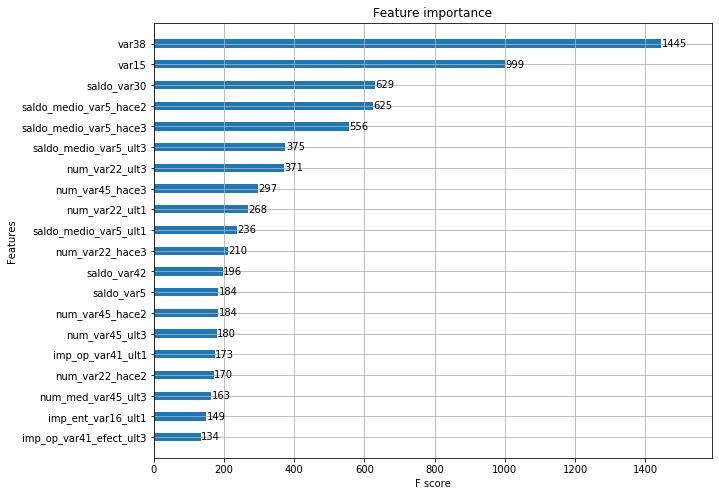

In [10]:
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(1,1,figsize=(10,8))
plot_importance(xgb_clf, ax=ax , max_num_features=20,height=0.4)

### LightGBM 모델 학습과 하이퍼 파라미터 튜닝

In [11]:
from lightgbm import LGBMClassifier

lgbm_clf = LGBMClassifier(n_estimators=500)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.817384	valid_0's binary_logloss: 0.165046
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.81863	valid_0's binary_logloss: 0.16
[3]	valid_0's auc: 0.827411	valid_0's binary_logloss: 0.156287
[4]	valid_0's auc: 0.832175	valid_0's binary_logloss: 0.153416
[5]	valid_0's auc: 0.83481	valid_0's binary_logloss: 0.151206
[6]	valid_0's auc: 0.834721	valid_0's binary_logloss: 0.149303
[7]	valid_0's auc: 0.83659	valid_0's binary_logloss: 0.147804
[8]	valid_0's auc: 0.837602	valid_0's binary_logloss: 0.146466
[9]	valid_0's auc: 0.838114	valid_0's binary_logloss: 0.145476
[10]	valid_0's auc: 0.838472	valid_0's binary_logloss: 0.144681
[11]	valid_0's auc: 0.83808	valid_0's binary_logloss: 0.143978
[12]	valid_0's auc: 0.837771	valid_0's binary_logloss: 0.14341
[13]	valid_0's auc: 0.838063	valid_0's binary_logloss: 0.142835
[14]	valid_0's auc: 0.838485	valid_0's binary_logloss: 0.142296
[15]	valid_0's auc: 0.838542	valid_0's binary_logloss: 0.141

[128]	valid_0's auc: 0.836152	valid_0's binary_logloss: 0.140781
[129]	valid_0's auc: 0.836156	valid_0's binary_logloss: 0.140809
[130]	valid_0's auc: 0.83605	valid_0's binary_logloss: 0.140835
[131]	valid_0's auc: 0.836033	valid_0's binary_logloss: 0.140835
[132]	valid_0's auc: 0.836014	valid_0's binary_logloss: 0.140852
[133]	valid_0's auc: 0.835977	valid_0's binary_logloss: 0.1409
[134]	valid_0's auc: 0.835695	valid_0's binary_logloss: 0.140951
[135]	valid_0's auc: 0.835689	valid_0's binary_logloss: 0.140975
[136]	valid_0's auc: 0.83554	valid_0's binary_logloss: 0.141011
[137]	valid_0's auc: 0.835146	valid_0's binary_logloss: 0.141098
[138]	valid_0's auc: 0.83503	valid_0's binary_logloss: 0.141136
[139]	valid_0's auc: 0.834826	valid_0's binary_logloss: 0.141206
[140]	valid_0's auc: 0.834576	valid_0's binary_logloss: 0.141267
[141]	valid_0's auc: 0.834265	valid_0's binary_logloss: 0.141328
[142]	valid_0's auc: 0.8342	valid_0's binary_logloss: 0.141359
Early stopping, best iteration i

In [12]:
from sklearn.model_selection import GridSearchCV

# 하이퍼 파라미터 테스트의 수행 속도를 향상시키기 위해 n_estimators를 100으로 감소
LGBM_clf = LGBMClassifier(n_estimators=200)

params = {'num_leaves': [32, 64 ],
          'max_depth':[128, 160],
          'min_child_samples':[60, 100],
          'subsample':[0.8, 1]}


# 하이퍼 파라미터 테스트의 수행속도를 향상 시키기 위해 cv 를 지정하지 않습니다. 
gridcv = GridSearchCV(lgbm_clf, param_grid=params)
gridcv.fit(X_train, y_train, early_stopping_rounds=30, eval_metric="auc",
           eval_set=[(X_train, y_train), (X_test, y_test)])

print('GridSearchCV 최적 파라미터:', gridcv.best_params_)
lgbm_roc_score = roc_auc_score(y_test, gridcv.predict_proba(X_test)[:,1], average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))


[1]	valid_0's auc: 0.823664	valid_0's binary_logloss: 0.156198	valid_1's auc: 0.821078	valid_1's binary_logloss: 0.16488
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.82965	valid_0's binary_logloss: 0.15092	valid_1's auc: 0.824865	valid_1's binary_logloss: 0.15978
[3]	valid_0's auc: 0.835112	valid_0's binary_logloss: 0.147151	valid_1's auc: 0.826157	valid_1's binary_logloss: 0.156174
[4]	valid_0's auc: 0.839678	valid_0's binary_logloss: 0.14422	valid_1's auc: 0.830489	valid_1's binary_logloss: 0.153395
[5]	valid_0's auc: 0.842477	valid_0's binary_logloss: 0.141762	valid_1's auc: 0.832915	valid_1's binary_logloss: 0.151083
[6]	valid_0's auc: 0.845763	valid_0's binary_logloss: 0.139668	valid_1's auc: 0.835313	valid_1's binary_logloss: 0.149317
[7]	valid_0's auc: 0.846352	valid_0's binary_logloss: 0.137997	valid_1's auc: 0.835977	valid_1's binary_logloss: 0.14773
[8]	valid_0's auc: 0.849153	valid_0's binary_logloss: 0.13653	valid_1's auc: 0.837152	valid

[25]	valid_0's auc: 0.871049	valid_0's binary_logloss: 0.125668	valid_1's auc: 0.838745	valid_1's binary_logloss: 0.13995
[26]	valid_0's auc: 0.872235	valid_0's binary_logloss: 0.125315	valid_1's auc: 0.838843	valid_1's binary_logloss: 0.139851
[27]	valid_0's auc: 0.873237	valid_0's binary_logloss: 0.124997	valid_1's auc: 0.838582	valid_1's binary_logloss: 0.139799
[28]	valid_0's auc: 0.874176	valid_0's binary_logloss: 0.124703	valid_1's auc: 0.838471	valid_1's binary_logloss: 0.13975
[29]	valid_0's auc: 0.875669	valid_0's binary_logloss: 0.12433	valid_1's auc: 0.838876	valid_1's binary_logloss: 0.139647
[30]	valid_0's auc: 0.876717	valid_0's binary_logloss: 0.12398	valid_1's auc: 0.838668	valid_1's binary_logloss: 0.139626
[31]	valid_0's auc: 0.877795	valid_0's binary_logloss: 0.123676	valid_1's auc: 0.838812	valid_1's binary_logloss: 0.139567
[32]	valid_0's auc: 0.878434	valid_0's binary_logloss: 0.12342	valid_1's auc: 0.838766	valid_1's binary_logloss: 0.139551
[33]	valid_0's auc: 0

[26]	valid_0's auc: 0.873104	valid_0's binary_logloss: 0.124779	valid_1's auc: 0.839199	valid_1's binary_logloss: 0.139332
[27]	valid_0's auc: 0.873923	valid_0's binary_logloss: 0.12445	valid_1's auc: 0.838771	valid_1's binary_logloss: 0.139331
[28]	valid_0's auc: 0.874885	valid_0's binary_logloss: 0.124137	valid_1's auc: 0.838559	valid_1's binary_logloss: 0.139318
[29]	valid_0's auc: 0.876023	valid_0's binary_logloss: 0.123799	valid_1's auc: 0.838707	valid_1's binary_logloss: 0.139253
[30]	valid_0's auc: 0.876849	valid_0's binary_logloss: 0.123528	valid_1's auc: 0.839016	valid_1's binary_logloss: 0.139194
[31]	valid_0's auc: 0.877276	valid_0's binary_logloss: 0.123253	valid_1's auc: 0.839117	valid_1's binary_logloss: 0.139112
[32]	valid_0's auc: 0.878261	valid_0's binary_logloss: 0.122955	valid_1's auc: 0.839004	valid_1's binary_logloss: 0.139114
[33]	valid_0's auc: 0.878852	valid_0's binary_logloss: 0.12268	valid_1's auc: 0.83874	valid_1's binary_logloss: 0.139099
[34]	valid_0's auc:

[11]	valid_0's auc: 0.854546	valid_0's binary_logloss: 0.133037	valid_1's auc: 0.838329	valid_1's binary_logloss: 0.144036
[12]	valid_0's auc: 0.857306	valid_0's binary_logloss: 0.132091	valid_1's auc: 0.838501	valid_1's binary_logloss: 0.143435
[13]	valid_0's auc: 0.858931	valid_0's binary_logloss: 0.131258	valid_1's auc: 0.837569	valid_1's binary_logloss: 0.143004
[14]	valid_0's auc: 0.8606	valid_0's binary_logloss: 0.130532	valid_1's auc: 0.838195	valid_1's binary_logloss: 0.14251
[15]	valid_0's auc: 0.862474	valid_0's binary_logloss: 0.129788	valid_1's auc: 0.838158	valid_1's binary_logloss: 0.142078
[16]	valid_0's auc: 0.864271	valid_0's binary_logloss: 0.129131	valid_1's auc: 0.838075	valid_1's binary_logloss: 0.141796
[17]	valid_0's auc: 0.865398	valid_0's binary_logloss: 0.128509	valid_1's auc: 0.837949	valid_1's binary_logloss: 0.141482
[18]	valid_0's auc: 0.866784	valid_0's binary_logloss: 0.127959	valid_1's auc: 0.838382	valid_1's binary_logloss: 0.141186
[19]	valid_0's auc:

[26]	valid_0's auc: 0.873637	valid_0's binary_logloss: 0.124863	valid_1's auc: 0.837507	valid_1's binary_logloss: 0.139972
[27]	valid_0's auc: 0.874915	valid_0's binary_logloss: 0.124512	valid_1's auc: 0.837071	valid_1's binary_logloss: 0.13997
[28]	valid_0's auc: 0.875606	valid_0's binary_logloss: 0.124208	valid_1's auc: 0.837619	valid_1's binary_logloss: 0.139871
[29]	valid_0's auc: 0.876828	valid_0's binary_logloss: 0.12384	valid_1's auc: 0.83773	valid_1's binary_logloss: 0.139822
[30]	valid_0's auc: 0.877457	valid_0's binary_logloss: 0.123547	valid_1's auc: 0.837455	valid_1's binary_logloss: 0.139791
[31]	valid_0's auc: 0.879129	valid_0's binary_logloss: 0.123153	valid_1's auc: 0.837573	valid_1's binary_logloss: 0.139724
[32]	valid_0's auc: 0.88021	valid_0's binary_logloss: 0.122849	valid_1's auc: 0.837413	valid_1's binary_logloss: 0.13971
[33]	valid_0's auc: 0.880849	valid_0's binary_logloss: 0.1226	valid_1's auc: 0.837328	valid_1's binary_logloss: 0.139722
[34]	valid_0's auc: 0.8

[59]	valid_0's auc: 0.895879	valid_0's binary_logloss: 0.117248	valid_1's auc: 0.839213	valid_1's binary_logloss: 0.139528
[60]	valid_0's auc: 0.896271	valid_0's binary_logloss: 0.117049	valid_1's auc: 0.839353	valid_1's binary_logloss: 0.13952
[61]	valid_0's auc: 0.896615	valid_0's binary_logloss: 0.116883	valid_1's auc: 0.839499	valid_1's binary_logloss: 0.139489
[62]	valid_0's auc: 0.896835	valid_0's binary_logloss: 0.116752	valid_1's auc: 0.83954	valid_1's binary_logloss: 0.139477
[63]	valid_0's auc: 0.897122	valid_0's binary_logloss: 0.116584	valid_1's auc: 0.839488	valid_1's binary_logloss: 0.139542
[64]	valid_0's auc: 0.897561	valid_0's binary_logloss: 0.116399	valid_1's auc: 0.839571	valid_1's binary_logloss: 0.139557
[65]	valid_0's auc: 0.89769	valid_0's binary_logloss: 0.116288	valid_1's auc: 0.839665	valid_1's binary_logloss: 0.139551
[66]	valid_0's auc: 0.898093	valid_0's binary_logloss: 0.116094	valid_1's auc: 0.839551	valid_1's binary_logloss: 0.139556
[67]	valid_0's auc:

[18]	valid_0's auc: 0.86416	valid_0's binary_logloss: 0.128464	valid_1's auc: 0.840222	valid_1's binary_logloss: 0.140694
[19]	valid_0's auc: 0.865283	valid_0's binary_logloss: 0.127961	valid_1's auc: 0.840849	valid_1's binary_logloss: 0.140423
[20]	valid_0's auc: 0.866225	valid_0's binary_logloss: 0.127509	valid_1's auc: 0.840833	valid_1's binary_logloss: 0.14018
[21]	valid_0's auc: 0.867694	valid_0's binary_logloss: 0.127023	valid_1's auc: 0.840208	valid_1's binary_logloss: 0.140086
[22]	valid_0's auc: 0.868631	valid_0's binary_logloss: 0.126644	valid_1's auc: 0.840015	valid_1's binary_logloss: 0.140012
[23]	valid_0's auc: 0.869457	valid_0's binary_logloss: 0.126294	valid_1's auc: 0.839557	valid_1's binary_logloss: 0.139913
[24]	valid_0's auc: 0.870406	valid_0's binary_logloss: 0.125894	valid_1's auc: 0.839413	valid_1's binary_logloss: 0.139821
[25]	valid_0's auc: 0.871712	valid_0's binary_logloss: 0.125533	valid_1's auc: 0.839452	valid_1's binary_logloss: 0.139734
[26]	valid_0's auc

[45]	valid_0's auc: 0.889218	valid_0's binary_logloss: 0.11959	valid_1's auc: 0.838093	valid_1's binary_logloss: 0.139831
[46]	valid_0's auc: 0.889658	valid_0's binary_logloss: 0.119417	valid_1's auc: 0.837688	valid_1's binary_logloss: 0.139882
[47]	valid_0's auc: 0.890378	valid_0's binary_logloss: 0.119151	valid_1's auc: 0.837716	valid_1's binary_logloss: 0.139877
[48]	valid_0's auc: 0.890895	valid_0's binary_logloss: 0.118954	valid_1's auc: 0.837653	valid_1's binary_logloss: 0.139901
[49]	valid_0's auc: 0.891347	valid_0's binary_logloss: 0.118761	valid_1's auc: 0.837491	valid_1's binary_logloss: 0.139944
[50]	valid_0's auc: 0.891951	valid_0's binary_logloss: 0.118533	valid_1's auc: 0.837711	valid_1's binary_logloss: 0.139907
[51]	valid_0's auc: 0.892473	valid_0's binary_logloss: 0.118332	valid_1's auc: 0.838058	valid_1's binary_logloss: 0.139842
[52]	valid_0's auc: 0.892939	valid_0's binary_logloss: 0.118139	valid_1's auc: 0.837957	valid_1's binary_logloss: 0.13987
[53]	valid_0's auc

[18]	valid_0's auc: 0.882862	valid_0's binary_logloss: 0.123389	valid_1's auc: 0.835962	valid_1's binary_logloss: 0.141335
[19]	valid_0's auc: 0.883967	valid_0's binary_logloss: 0.122718	valid_1's auc: 0.835817	valid_1's binary_logloss: 0.141185
[20]	valid_0's auc: 0.885189	valid_0's binary_logloss: 0.122115	valid_1's auc: 0.835302	valid_1's binary_logloss: 0.141116
[21]	valid_0's auc: 0.886826	valid_0's binary_logloss: 0.121432	valid_1's auc: 0.835725	valid_1's binary_logloss: 0.140891
[22]	valid_0's auc: 0.888693	valid_0's binary_logloss: 0.120776	valid_1's auc: 0.835519	valid_1's binary_logloss: 0.140802
[23]	valid_0's auc: 0.889885	valid_0's binary_logloss: 0.120198	valid_1's auc: 0.835672	valid_1's binary_logloss: 0.140729
[24]	valid_0's auc: 0.890875	valid_0's binary_logloss: 0.119668	valid_1's auc: 0.835224	valid_1's binary_logloss: 0.14069
[25]	valid_0's auc: 0.892153	valid_0's binary_logloss: 0.119154	valid_1's auc: 0.834686	valid_1's binary_logloss: 0.140665
[26]	valid_0's au

[8]	valid_0's auc: 0.862776	valid_0's binary_logloss: 0.133782	valid_1's auc: 0.839429	valid_1's binary_logloss: 0.146252
[9]	valid_0's auc: 0.864413	valid_0's binary_logloss: 0.132378	valid_1's auc: 0.839869	valid_1's binary_logloss: 0.145344
[10]	valid_0's auc: 0.867139	valid_0's binary_logloss: 0.131035	valid_1's auc: 0.840976	valid_1's binary_logloss: 0.144453
[11]	valid_0's auc: 0.869228	valid_0's binary_logloss: 0.129818	valid_1's auc: 0.841221	valid_1's binary_logloss: 0.143603
[12]	valid_0's auc: 0.871396	valid_0's binary_logloss: 0.12874	valid_1's auc: 0.84082	valid_1's binary_logloss: 0.142987
[13]	valid_0's auc: 0.872944	valid_0's binary_logloss: 0.127718	valid_1's auc: 0.840903	valid_1's binary_logloss: 0.142482
[14]	valid_0's auc: 0.874408	valid_0's binary_logloss: 0.126796	valid_1's auc: 0.840501	valid_1's binary_logloss: 0.142054
[15]	valid_0's auc: 0.875827	valid_0's binary_logloss: 0.12592	valid_1's auc: 0.84066	valid_1's binary_logloss: 0.141743
[16]	valid_0's auc: 0.

[33]	valid_0's auc: 0.902407	valid_0's binary_logloss: 0.114726	valid_1's auc: 0.836225	valid_1's binary_logloss: 0.139984
[34]	valid_0's auc: 0.90329	valid_0's binary_logloss: 0.114316	valid_1's auc: 0.836812	valid_1's binary_logloss: 0.139876
[35]	valid_0's auc: 0.904183	valid_0's binary_logloss: 0.113931	valid_1's auc: 0.836852	valid_1's binary_logloss: 0.139836
[36]	valid_0's auc: 0.905135	valid_0's binary_logloss: 0.113541	valid_1's auc: 0.837068	valid_1's binary_logloss: 0.139779
[37]	valid_0's auc: 0.905663	valid_0's binary_logloss: 0.1132	valid_1's auc: 0.837534	valid_1's binary_logloss: 0.139679
[38]	valid_0's auc: 0.906461	valid_0's binary_logloss: 0.112815	valid_1's auc: 0.837503	valid_1's binary_logloss: 0.139671
[39]	valid_0's auc: 0.907392	valid_0's binary_logloss: 0.112388	valid_1's auc: 0.837172	valid_1's binary_logloss: 0.139719
Early stopping, best iteration is:
[9]	valid_0's auc: 0.868891	valid_0's binary_logloss: 0.131926	valid_1's auc: 0.84218	valid_1's binary_logl

[17]	valid_0's auc: 0.880956	valid_0's binary_logloss: 0.124122	valid_1's auc: 0.835959	valid_1's binary_logloss: 0.141525
[18]	valid_0's auc: 0.882862	valid_0's binary_logloss: 0.123389	valid_1's auc: 0.835962	valid_1's binary_logloss: 0.141335
[19]	valid_0's auc: 0.883967	valid_0's binary_logloss: 0.122718	valid_1's auc: 0.835817	valid_1's binary_logloss: 0.141185
[20]	valid_0's auc: 0.885189	valid_0's binary_logloss: 0.122115	valid_1's auc: 0.835302	valid_1's binary_logloss: 0.141116
[21]	valid_0's auc: 0.886826	valid_0's binary_logloss: 0.121432	valid_1's auc: 0.835725	valid_1's binary_logloss: 0.140891
[22]	valid_0's auc: 0.888693	valid_0's binary_logloss: 0.120776	valid_1's auc: 0.835519	valid_1's binary_logloss: 0.140802
[23]	valid_0's auc: 0.889885	valid_0's binary_logloss: 0.120198	valid_1's auc: 0.835672	valid_1's binary_logloss: 0.140729
[24]	valid_0's auc: 0.890875	valid_0's binary_logloss: 0.119668	valid_1's auc: 0.835224	valid_1's binary_logloss: 0.14069
[25]	valid_0's au

[8]	valid_0's auc: 0.862776	valid_0's binary_logloss: 0.133782	valid_1's auc: 0.839429	valid_1's binary_logloss: 0.146252
[9]	valid_0's auc: 0.864413	valid_0's binary_logloss: 0.132378	valid_1's auc: 0.839869	valid_1's binary_logloss: 0.145344
[10]	valid_0's auc: 0.867139	valid_0's binary_logloss: 0.131035	valid_1's auc: 0.840976	valid_1's binary_logloss: 0.144453
[11]	valid_0's auc: 0.869228	valid_0's binary_logloss: 0.129818	valid_1's auc: 0.841221	valid_1's binary_logloss: 0.143603
[12]	valid_0's auc: 0.871396	valid_0's binary_logloss: 0.12874	valid_1's auc: 0.84082	valid_1's binary_logloss: 0.142987
[13]	valid_0's auc: 0.872944	valid_0's binary_logloss: 0.127718	valid_1's auc: 0.840903	valid_1's binary_logloss: 0.142482
[14]	valid_0's auc: 0.874408	valid_0's binary_logloss: 0.126796	valid_1's auc: 0.840501	valid_1's binary_logloss: 0.142054
[15]	valid_0's auc: 0.875827	valid_0's binary_logloss: 0.12592	valid_1's auc: 0.84066	valid_1's binary_logloss: 0.141743
[16]	valid_0's auc: 0.

[33]	valid_0's auc: 0.902407	valid_0's binary_logloss: 0.114726	valid_1's auc: 0.836225	valid_1's binary_logloss: 0.139984
[34]	valid_0's auc: 0.90329	valid_0's binary_logloss: 0.114316	valid_1's auc: 0.836812	valid_1's binary_logloss: 0.139876
[35]	valid_0's auc: 0.904183	valid_0's binary_logloss: 0.113931	valid_1's auc: 0.836852	valid_1's binary_logloss: 0.139836
[36]	valid_0's auc: 0.905135	valid_0's binary_logloss: 0.113541	valid_1's auc: 0.837068	valid_1's binary_logloss: 0.139779
[37]	valid_0's auc: 0.905663	valid_0's binary_logloss: 0.1132	valid_1's auc: 0.837534	valid_1's binary_logloss: 0.139679
[38]	valid_0's auc: 0.906461	valid_0's binary_logloss: 0.112815	valid_1's auc: 0.837503	valid_1's binary_logloss: 0.139671
[39]	valid_0's auc: 0.907392	valid_0's binary_logloss: 0.112388	valid_1's auc: 0.837172	valid_1's binary_logloss: 0.139719
Early stopping, best iteration is:
[9]	valid_0's auc: 0.868891	valid_0's binary_logloss: 0.131926	valid_1's auc: 0.84218	valid_1's binary_logl

[22]	valid_0's auc: 0.868543	valid_0's binary_logloss: 0.126965	valid_1's auc: 0.839411	valid_1's binary_logloss: 0.140109
[23]	valid_0's auc: 0.869425	valid_0's binary_logloss: 0.126584	valid_1's auc: 0.839209	valid_1's binary_logloss: 0.140008
[24]	valid_0's auc: 0.870709	valid_0's binary_logloss: 0.126196	valid_1's auc: 0.839023	valid_1's binary_logloss: 0.139927
[25]	valid_0's auc: 0.871705	valid_0's binary_logloss: 0.125859	valid_1's auc: 0.839425	valid_1's binary_logloss: 0.139761
[26]	valid_0's auc: 0.872446	valid_0's binary_logloss: 0.125544	valid_1's auc: 0.839558	valid_1's binary_logloss: 0.139669
[27]	valid_0's auc: 0.873429	valid_0's binary_logloss: 0.12522	valid_1's auc: 0.839302	valid_1's binary_logloss: 0.139616
[28]	valid_0's auc: 0.874223	valid_0's binary_logloss: 0.124891	valid_1's auc: 0.839407	valid_1's binary_logloss: 0.139551
[29]	valid_0's auc: 0.875633	valid_0's binary_logloss: 0.124519	valid_1's auc: 0.839481	valid_1's binary_logloss: 0.139476
[30]	valid_0's au

[10]	valid_0's auc: 0.855068	valid_0's binary_logloss: 0.134344	valid_1's auc: 0.837945	valid_1's binary_logloss: 0.14436
[11]	valid_0's auc: 0.85623	valid_0's binary_logloss: 0.133408	valid_1's auc: 0.838505	valid_1's binary_logloss: 0.143531
[12]	valid_0's auc: 0.858039	valid_0's binary_logloss: 0.132542	valid_1's auc: 0.837412	valid_1's binary_logloss: 0.14298
[13]	valid_0's auc: 0.859028	valid_0's binary_logloss: 0.131715	valid_1's auc: 0.837556	valid_1's binary_logloss: 0.142378
[14]	valid_0's auc: 0.859761	valid_0's binary_logloss: 0.131029	valid_1's auc: 0.837747	valid_1's binary_logloss: 0.141936
[15]	valid_0's auc: 0.860544	valid_0's binary_logloss: 0.130418	valid_1's auc: 0.837904	valid_1's binary_logloss: 0.141546
[16]	valid_0's auc: 0.861421	valid_0's binary_logloss: 0.129852	valid_1's auc: 0.838385	valid_1's binary_logloss: 0.141202
[17]	valid_0's auc: 0.862273	valid_0's binary_logloss: 0.129325	valid_1's auc: 0.838706	valid_1's binary_logloss: 0.140882
[18]	valid_0's auc:

[18]	valid_0's auc: 0.863322	valid_0's binary_logloss: 0.128971	valid_1's auc: 0.840677	valid_1's binary_logloss: 0.140784
[19]	valid_0's auc: 0.864222	valid_0's binary_logloss: 0.128503	valid_1's auc: 0.84088	valid_1's binary_logloss: 0.140519
[20]	valid_0's auc: 0.865397	valid_0's binary_logloss: 0.12806	valid_1's auc: 0.840878	valid_1's binary_logloss: 0.140299
[21]	valid_0's auc: 0.866278	valid_0's binary_logloss: 0.127647	valid_1's auc: 0.84104	valid_1's binary_logloss: 0.14011
[22]	valid_0's auc: 0.867123	valid_0's binary_logloss: 0.12726	valid_1's auc: 0.840847	valid_1's binary_logloss: 0.139967
[23]	valid_0's auc: 0.868299	valid_0's binary_logloss: 0.126879	valid_1's auc: 0.840645	valid_1's binary_logloss: 0.139859
[24]	valid_0's auc: 0.868969	valid_0's binary_logloss: 0.126539	valid_1's auc: 0.840613	valid_1's binary_logloss: 0.139718
[25]	valid_0's auc: 0.869633	valid_0's binary_logloss: 0.126207	valid_1's auc: 0.840891	valid_1's binary_logloss: 0.139605
[26]	valid_0's auc: 0

[16]	valid_0's auc: 0.863881	valid_0's binary_logloss: 0.129599	valid_1's auc: 0.839301	valid_1's binary_logloss: 0.141721
[17]	valid_0's auc: 0.865172	valid_0's binary_logloss: 0.129048	valid_1's auc: 0.839254	valid_1's binary_logloss: 0.141394
[18]	valid_0's auc: 0.866347	valid_0's binary_logloss: 0.128499	valid_1's auc: 0.838727	valid_1's binary_logloss: 0.141154
[19]	valid_0's auc: 0.867494	valid_0's binary_logloss: 0.127978	valid_1's auc: 0.838823	valid_1's binary_logloss: 0.14085
[20]	valid_0's auc: 0.868446	valid_0's binary_logloss: 0.127501	valid_1's auc: 0.839034	valid_1's binary_logloss: 0.140713
[21]	valid_0's auc: 0.869399	valid_0's binary_logloss: 0.127084	valid_1's auc: 0.839077	valid_1's binary_logloss: 0.140501
[22]	valid_0's auc: 0.870345	valid_0's binary_logloss: 0.12668	valid_1's auc: 0.839281	valid_1's binary_logloss: 0.140273
[23]	valid_0's auc: 0.871035	valid_0's binary_logloss: 0.126324	valid_1's auc: 0.839652	valid_1's binary_logloss: 0.140125
[24]	valid_0's auc

[1]	valid_0's auc: 0.822096	valid_0's binary_logloss: 0.15642	valid_1's auc: 0.814231	valid_1's binary_logloss: 0.165423
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.830899	valid_0's binary_logloss: 0.151112	valid_1's auc: 0.821277	valid_1's binary_logloss: 0.160161
[3]	valid_0's auc: 0.838891	valid_0's binary_logloss: 0.14722	valid_1's auc: 0.827874	valid_1's binary_logloss: 0.15652
[4]	valid_0's auc: 0.842728	valid_0's binary_logloss: 0.14425	valid_1's auc: 0.83071	valid_1's binary_logloss: 0.153668
[5]	valid_0's auc: 0.845584	valid_0's binary_logloss: 0.141826	valid_1's auc: 0.834779	valid_1's binary_logloss: 0.151293
[6]	valid_0's auc: 0.847718	valid_0's binary_logloss: 0.139818	valid_1's auc: 0.837009	valid_1's binary_logloss: 0.149383
[7]	valid_0's auc: 0.849442	valid_0's binary_logloss: 0.138163	valid_1's auc: 0.838677	valid_1's binary_logloss: 0.147893
[8]	valid_0's auc: 0.851282	valid_0's binary_logloss: 0.136716	valid_1's auc: 0.839194	val

[71]	valid_0's auc: 0.897493	valid_0's binary_logloss: 0.116317	valid_1's auc: 0.839229	valid_1's binary_logloss: 0.139467
[72]	valid_0's auc: 0.897883	valid_0's binary_logloss: 0.11619	valid_1's auc: 0.839233	valid_1's binary_logloss: 0.139492
[73]	valid_0's auc: 0.898081	valid_0's binary_logloss: 0.11609	valid_1's auc: 0.839315	valid_1's binary_logloss: 0.139474
[74]	valid_0's auc: 0.898317	valid_0's binary_logloss: 0.115945	valid_1's auc: 0.839169	valid_1's binary_logloss: 0.139537
[75]	valid_0's auc: 0.898738	valid_0's binary_logloss: 0.115738	valid_1's auc: 0.839045	valid_1's binary_logloss: 0.139572
[76]	valid_0's auc: 0.899277	valid_0's binary_logloss: 0.11555	valid_1's auc: 0.838538	valid_1's binary_logloss: 0.139666
[77]	valid_0's auc: 0.899505	valid_0's binary_logloss: 0.115452	valid_1's auc: 0.83811	valid_1's binary_logloss: 0.139767
[78]	valid_0's auc: 0.899761	valid_0's binary_logloss: 0.115315	valid_1's auc: 0.837928	valid_1's binary_logloss: 0.139811
[79]	valid_0's auc: 

[56]	valid_0's auc: 0.890952	valid_0's binary_logloss: 0.118657	valid_1's auc: 0.838015	valid_1's binary_logloss: 0.139254
[57]	valid_0's auc: 0.891279	valid_0's binary_logloss: 0.118517	valid_1's auc: 0.837861	valid_1's binary_logloss: 0.139295
Early stopping, best iteration is:
[27]	valid_0's auc: 0.872308	valid_0's binary_logloss: 0.125268	valid_1's auc: 0.839783	valid_1's binary_logloss: 0.139278
[1]	valid_0's auc: 0.823467	valid_0's binary_logloss: 0.156234	valid_1's auc: 0.818359	valid_1's binary_logloss: 0.165045
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.828944	valid_0's binary_logloss: 0.151015	valid_1's auc: 0.824175	valid_1's binary_logloss: 0.159943
[3]	valid_0's auc: 0.836434	valid_0's binary_logloss: 0.147258	valid_1's auc: 0.828101	valid_1's binary_logloss: 0.156259
[4]	valid_0's auc: 0.842016	valid_0's binary_logloss: 0.144302	valid_1's auc: 0.833931	valid_1's binary_logloss: 0.153356
[5]	valid_0's auc: 0.844482	valid_0's binary_lo

[65]	valid_0's auc: 0.891913	valid_0's binary_logloss: 0.118029	valid_1's auc: 0.839511	valid_1's binary_logloss: 0.139428
[66]	valid_0's auc: 0.89249	valid_0's binary_logloss: 0.117797	valid_1's auc: 0.839463	valid_1's binary_logloss: 0.139436
[67]	valid_0's auc: 0.892736	valid_0's binary_logloss: 0.117667	valid_1's auc: 0.839345	valid_1's binary_logloss: 0.139462
Early stopping, best iteration is:
[37]	valid_0's auc: 0.878297	valid_0's binary_logloss: 0.123127	valid_1's auc: 0.841419	valid_1's binary_logloss: 0.139
[1]	valid_0's auc: 0.822477	valid_0's binary_logloss: 0.156615	valid_1's auc: 0.818936	valid_1's binary_logloss: 0.16507
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.829937	valid_0's binary_logloss: 0.151224	valid_1's auc: 0.824105	valid_1's binary_logloss: 0.159979
[3]	valid_0's auc: 0.835994	valid_0's binary_logloss: 0.147371	valid_1's auc: 0.829897	valid_1's binary_logloss: 0.156364
[4]	valid_0's auc: 0.842039	valid_0's binary_loglos

[24]	valid_0's auc: 0.888246	valid_0's binary_logloss: 0.121185	valid_1's auc: 0.834253	valid_1's binary_logloss: 0.140546
[25]	valid_0's auc: 0.889454	valid_0's binary_logloss: 0.120667	valid_1's auc: 0.833891	valid_1's binary_logloss: 0.140513
[26]	valid_0's auc: 0.890553	valid_0's binary_logloss: 0.120245	valid_1's auc: 0.833611	valid_1's binary_logloss: 0.140533
[27]	valid_0's auc: 0.891574	valid_0's binary_logloss: 0.119744	valid_1's auc: 0.833304	valid_1's binary_logloss: 0.140532
[28]	valid_0's auc: 0.892648	valid_0's binary_logloss: 0.119308	valid_1's auc: 0.832963	valid_1's binary_logloss: 0.140536
[29]	valid_0's auc: 0.893728	valid_0's binary_logloss: 0.11884	valid_1's auc: 0.832714	valid_1's binary_logloss: 0.140528
[30]	valid_0's auc: 0.89496	valid_0's binary_logloss: 0.118388	valid_1's auc: 0.832875	valid_1's binary_logloss: 0.140472
[31]	valid_0's auc: 0.8959	valid_0's binary_logloss: 0.117982	valid_1's auc: 0.832306	valid_1's binary_logloss: 0.140553
[32]	valid_0's auc: 

[14]	valid_0's auc: 0.874361	valid_0's binary_logloss: 0.127437	valid_1's auc: 0.839073	valid_1's binary_logloss: 0.141404
[15]	valid_0's auc: 0.876098	valid_0's binary_logloss: 0.126598	valid_1's auc: 0.838285	valid_1's binary_logloss: 0.141151
[16]	valid_0's auc: 0.877596	valid_0's binary_logloss: 0.125803	valid_1's auc: 0.838484	valid_1's binary_logloss: 0.140868
[17]	valid_0's auc: 0.879382	valid_0's binary_logloss: 0.125043	valid_1's auc: 0.839033	valid_1's binary_logloss: 0.140538
[18]	valid_0's auc: 0.880373	valid_0's binary_logloss: 0.124368	valid_1's auc: 0.838596	valid_1's binary_logloss: 0.140383
[19]	valid_0's auc: 0.882263	valid_0's binary_logloss: 0.123754	valid_1's auc: 0.838103	valid_1's binary_logloss: 0.140222
[20]	valid_0's auc: 0.883375	valid_0's binary_logloss: 0.123182	valid_1's auc: 0.838085	valid_1's binary_logloss: 0.140075
[21]	valid_0's auc: 0.884525	valid_0's binary_logloss: 0.122599	valid_1's auc: 0.838622	valid_1's binary_logloss: 0.139898
[22]	valid_0's a

[38]	valid_0's auc: 0.900611	valid_0's binary_logloss: 0.115643	valid_1's auc: 0.839275	valid_1's binary_logloss: 0.139279
[39]	valid_0's auc: 0.901386	valid_0's binary_logloss: 0.115309	valid_1's auc: 0.838695	valid_1's binary_logloss: 0.139419
[40]	valid_0's auc: 0.902187	valid_0's binary_logloss: 0.114964	valid_1's auc: 0.838583	valid_1's binary_logloss: 0.139426
[41]	valid_0's auc: 0.902835	valid_0's binary_logloss: 0.114647	valid_1's auc: 0.838589	valid_1's binary_logloss: 0.139468
[42]	valid_0's auc: 0.903582	valid_0's binary_logloss: 0.114281	valid_1's auc: 0.838589	valid_1's binary_logloss: 0.139466
[43]	valid_0's auc: 0.904313	valid_0's binary_logloss: 0.113958	valid_1's auc: 0.838242	valid_1's binary_logloss: 0.139499
[44]	valid_0's auc: 0.904841	valid_0's binary_logloss: 0.113635	valid_1's auc: 0.838466	valid_1's binary_logloss: 0.13949
[45]	valid_0's auc: 0.905581	valid_0's binary_logloss: 0.113268	valid_1's auc: 0.838414	valid_1's binary_logloss: 0.139532
[46]	valid_0's au

[9]	valid_0's auc: 0.866446	valid_0's binary_logloss: 0.132978	valid_1's auc: 0.836892	valid_1's binary_logloss: 0.14524
[10]	valid_0's auc: 0.86769	valid_0's binary_logloss: 0.131709	valid_1's auc: 0.837761	valid_1's binary_logloss: 0.144369
[11]	valid_0's auc: 0.870043	valid_0's binary_logloss: 0.130502	valid_1's auc: 0.836929	valid_1's binary_logloss: 0.143667
[12]	valid_0's auc: 0.872157	valid_0's binary_logloss: 0.12943	valid_1's auc: 0.837131	valid_1's binary_logloss: 0.143071
[13]	valid_0's auc: 0.873846	valid_0's binary_logloss: 0.128485	valid_1's auc: 0.837222	valid_1's binary_logloss: 0.142533
[14]	valid_0's auc: 0.874865	valid_0's binary_logloss: 0.127602	valid_1's auc: 0.836412	valid_1's binary_logloss: 0.142206
[15]	valid_0's auc: 0.876476	valid_0's binary_logloss: 0.126803	valid_1's auc: 0.836305	valid_1's binary_logloss: 0.141856
[16]	valid_0's auc: 0.878541	valid_0's binary_logloss: 0.125992	valid_1's auc: 0.835636	valid_1's binary_logloss: 0.141705
[17]	valid_0's auc: 

[1]	valid_0's auc: 0.834438	valid_0's binary_logloss: 0.155707	valid_1's auc: 0.821419	valid_1's binary_logloss: 0.164715
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.846144	valid_0's binary_logloss: 0.150047	valid_1's auc: 0.829297	valid_1's binary_logloss: 0.159501
[3]	valid_0's auc: 0.850748	valid_0's binary_logloss: 0.145939	valid_1's auc: 0.832015	valid_1's binary_logloss: 0.155723
[4]	valid_0's auc: 0.854724	valid_0's binary_logloss: 0.142635	valid_1's auc: 0.835829	valid_1's binary_logloss: 0.152741
[5]	valid_0's auc: 0.857933	valid_0's binary_logloss: 0.139975	valid_1's auc: 0.836781	valid_1's binary_logloss: 0.150453
[6]	valid_0's auc: 0.860689	valid_0's binary_logloss: 0.137721	valid_1's auc: 0.836788	valid_1's binary_logloss: 0.148529
[7]	valid_0's auc: 0.862487	valid_0's binary_logloss: 0.135899	valid_1's auc: 0.837553	valid_1's binary_logloss: 0.147049
[8]	valid_0's auc: 0.864201	valid_0's binary_logloss: 0.134257	valid_1's auc: 0.83850

[26]	valid_0's auc: 0.88901	valid_0's binary_logloss: 0.120543	valid_1's auc: 0.839667	valid_1's binary_logloss: 0.139398
[27]	valid_0's auc: 0.890029	valid_0's binary_logloss: 0.120084	valid_1's auc: 0.839403	valid_1's binary_logloss: 0.1394
[28]	valid_0's auc: 0.890855	valid_0's binary_logloss: 0.119625	valid_1's auc: 0.839197	valid_1's binary_logloss: 0.139395
[29]	valid_0's auc: 0.891693	valid_0's binary_logloss: 0.11927	valid_1's auc: 0.839139	valid_1's binary_logloss: 0.139388
[30]	valid_0's auc: 0.893076	valid_0's binary_logloss: 0.118772	valid_1's auc: 0.839184	valid_1's binary_logloss: 0.139362
[31]	valid_0's auc: 0.893948	valid_0's binary_logloss: 0.118371	valid_1's auc: 0.839033	valid_1's binary_logloss: 0.139379
[32]	valid_0's auc: 0.894817	valid_0's binary_logloss: 0.118017	valid_1's auc: 0.839601	valid_1's binary_logloss: 0.139254
[33]	valid_0's auc: 0.895646	valid_0's binary_logloss: 0.117657	valid_1's auc: 0.839317	valid_1's binary_logloss: 0.139315
[34]	valid_0's auc: 

[45]	valid_0's auc: 0.907423	valid_0's binary_logloss: 0.112557	valid_1's auc: 0.837137	valid_1's binary_logloss: 0.139868
[46]	valid_0's auc: 0.907851	valid_0's binary_logloss: 0.112266	valid_1's auc: 0.837425	valid_1's binary_logloss: 0.139843
[47]	valid_0's auc: 0.908566	valid_0's binary_logloss: 0.111952	valid_1's auc: 0.837431	valid_1's binary_logloss: 0.139893
[48]	valid_0's auc: 0.909236	valid_0's binary_logloss: 0.111656	valid_1's auc: 0.837625	valid_1's binary_logloss: 0.139856
[49]	valid_0's auc: 0.909884	valid_0's binary_logloss: 0.111332	valid_1's auc: 0.837497	valid_1's binary_logloss: 0.139881
[50]	valid_0's auc: 0.91027	valid_0's binary_logloss: 0.111076	valid_1's auc: 0.837446	valid_1's binary_logloss: 0.139932
[51]	valid_0's auc: 0.910654	valid_0's binary_logloss: 0.110807	valid_1's auc: 0.837332	valid_1's binary_logloss: 0.13997
Early stopping, best iteration is:
[21]	valid_0's auc: 0.885332	valid_0's binary_logloss: 0.122652	valid_1's auc: 0.83937	valid_1's binary_lo

[24]	valid_0's auc: 0.870076	valid_0's binary_logloss: 0.126056	valid_1's auc: 0.838227	valid_1's binary_logloss: 0.140071
[25]	valid_0's auc: 0.871049	valid_0's binary_logloss: 0.125668	valid_1's auc: 0.838745	valid_1's binary_logloss: 0.13995
[26]	valid_0's auc: 0.872235	valid_0's binary_logloss: 0.125315	valid_1's auc: 0.838843	valid_1's binary_logloss: 0.139851
[27]	valid_0's auc: 0.873237	valid_0's binary_logloss: 0.124997	valid_1's auc: 0.838582	valid_1's binary_logloss: 0.139799
[28]	valid_0's auc: 0.874176	valid_0's binary_logloss: 0.124703	valid_1's auc: 0.838471	valid_1's binary_logloss: 0.13975
[29]	valid_0's auc: 0.875669	valid_0's binary_logloss: 0.12433	valid_1's auc: 0.838876	valid_1's binary_logloss: 0.139647
[30]	valid_0's auc: 0.876717	valid_0's binary_logloss: 0.12398	valid_1's auc: 0.838668	valid_1's binary_logloss: 0.139626
[31]	valid_0's auc: 0.877795	valid_0's binary_logloss: 0.123676	valid_1's auc: 0.838812	valid_1's binary_logloss: 0.139567
[32]	valid_0's auc: 

[27]	valid_0's auc: 0.873923	valid_0's binary_logloss: 0.12445	valid_1's auc: 0.838771	valid_1's binary_logloss: 0.139331
[28]	valid_0's auc: 0.874885	valid_0's binary_logloss: 0.124137	valid_1's auc: 0.838559	valid_1's binary_logloss: 0.139318
[29]	valid_0's auc: 0.876023	valid_0's binary_logloss: 0.123799	valid_1's auc: 0.838707	valid_1's binary_logloss: 0.139253
[30]	valid_0's auc: 0.876849	valid_0's binary_logloss: 0.123528	valid_1's auc: 0.839016	valid_1's binary_logloss: 0.139194
[31]	valid_0's auc: 0.877276	valid_0's binary_logloss: 0.123253	valid_1's auc: 0.839117	valid_1's binary_logloss: 0.139112
[32]	valid_0's auc: 0.878261	valid_0's binary_logloss: 0.122955	valid_1's auc: 0.839004	valid_1's binary_logloss: 0.139114
[33]	valid_0's auc: 0.878852	valid_0's binary_logloss: 0.12268	valid_1's auc: 0.83874	valid_1's binary_logloss: 0.139099
[34]	valid_0's auc: 0.880003	valid_0's binary_logloss: 0.122395	valid_1's auc: 0.838575	valid_1's binary_logloss: 0.139116
[35]	valid_0's auc:

[12]	valid_0's auc: 0.857306	valid_0's binary_logloss: 0.132091	valid_1's auc: 0.838501	valid_1's binary_logloss: 0.143435
[13]	valid_0's auc: 0.858931	valid_0's binary_logloss: 0.131258	valid_1's auc: 0.837569	valid_1's binary_logloss: 0.143004
[14]	valid_0's auc: 0.8606	valid_0's binary_logloss: 0.130532	valid_1's auc: 0.838195	valid_1's binary_logloss: 0.14251
[15]	valid_0's auc: 0.862474	valid_0's binary_logloss: 0.129788	valid_1's auc: 0.838158	valid_1's binary_logloss: 0.142078
[16]	valid_0's auc: 0.864271	valid_0's binary_logloss: 0.129131	valid_1's auc: 0.838075	valid_1's binary_logloss: 0.141796
[17]	valid_0's auc: 0.865398	valid_0's binary_logloss: 0.128509	valid_1's auc: 0.837949	valid_1's binary_logloss: 0.141482
[18]	valid_0's auc: 0.866784	valid_0's binary_logloss: 0.127959	valid_1's auc: 0.838382	valid_1's binary_logloss: 0.141186
[19]	valid_0's auc: 0.867792	valid_0's binary_logloss: 0.127422	valid_1's auc: 0.838186	valid_1's binary_logloss: 0.141055
[20]	valid_0's auc:

[28]	valid_0's auc: 0.875606	valid_0's binary_logloss: 0.124208	valid_1's auc: 0.837619	valid_1's binary_logloss: 0.139871
[29]	valid_0's auc: 0.876828	valid_0's binary_logloss: 0.12384	valid_1's auc: 0.83773	valid_1's binary_logloss: 0.139822
[30]	valid_0's auc: 0.877457	valid_0's binary_logloss: 0.123547	valid_1's auc: 0.837455	valid_1's binary_logloss: 0.139791
[31]	valid_0's auc: 0.879129	valid_0's binary_logloss: 0.123153	valid_1's auc: 0.837573	valid_1's binary_logloss: 0.139724
[32]	valid_0's auc: 0.88021	valid_0's binary_logloss: 0.122849	valid_1's auc: 0.837413	valid_1's binary_logloss: 0.13971
[33]	valid_0's auc: 0.880849	valid_0's binary_logloss: 0.1226	valid_1's auc: 0.837328	valid_1's binary_logloss: 0.139722
[34]	valid_0's auc: 0.881626	valid_0's binary_logloss: 0.122303	valid_1's auc: 0.836546	valid_1's binary_logloss: 0.139833
[35]	valid_0's auc: 0.88223	valid_0's binary_logloss: 0.122074	valid_1's auc: 0.836267	valid_1's binary_logloss: 0.139875
[36]	valid_0's auc: 0.8

[52]	valid_0's auc: 0.89242	valid_0's binary_logloss: 0.118626	valid_1's auc: 0.839291	valid_1's binary_logloss: 0.13951
[53]	valid_0's auc: 0.892792	valid_0's binary_logloss: 0.118453	valid_1's auc: 0.838949	valid_1's binary_logloss: 0.139544
[54]	valid_0's auc: 0.893288	valid_0's binary_logloss: 0.118266	valid_1's auc: 0.838832	valid_1's binary_logloss: 0.139575
[55]	valid_0's auc: 0.893769	valid_0's binary_logloss: 0.11806	valid_1's auc: 0.838627	valid_1's binary_logloss: 0.139607
[56]	valid_0's auc: 0.894199	valid_0's binary_logloss: 0.11793	valid_1's auc: 0.838463	valid_1's binary_logloss: 0.139637
[57]	valid_0's auc: 0.89466	valid_0's binary_logloss: 0.117712	valid_1's auc: 0.838783	valid_1's binary_logloss: 0.139591
[58]	valid_0's auc: 0.895326	valid_0's binary_logloss: 0.117469	valid_1's auc: 0.839033	valid_1's binary_logloss: 0.13955
[59]	valid_0's auc: 0.895879	valid_0's binary_logloss: 0.117248	valid_1's auc: 0.839213	valid_1's binary_logloss: 0.139528
[60]	valid_0's auc: 0.

[9]	valid_0's auc: 0.851654	valid_0's binary_logloss: 0.135266	valid_1's auc: 0.838965	valid_1's binary_logloss: 0.145242
[10]	valid_0's auc: 0.853064	valid_0's binary_logloss: 0.134115	valid_1's auc: 0.839823	valid_1's binary_logloss: 0.144302
[11]	valid_0's auc: 0.854919	valid_0's binary_logloss: 0.133155	valid_1's auc: 0.840621	valid_1's binary_logloss: 0.143506
[12]	valid_0's auc: 0.856715	valid_0's binary_logloss: 0.132248	valid_1's auc: 0.840435	valid_1's binary_logloss: 0.142879
[13]	valid_0's auc: 0.858054	valid_0's binary_logloss: 0.131499	valid_1's auc: 0.840894	valid_1's binary_logloss: 0.142242
[14]	valid_0's auc: 0.859881	valid_0's binary_logloss: 0.130754	valid_1's auc: 0.840391	valid_1's binary_logloss: 0.141889
[15]	valid_0's auc: 0.860608	valid_0's binary_logloss: 0.130108	valid_1's auc: 0.839964	valid_1's binary_logloss: 0.141599
[16]	valid_0's auc: 0.86226	valid_0's binary_logloss: 0.129507	valid_1's auc: 0.839505	valid_1's binary_logloss: 0.141272
[17]	valid_0's auc

[34]	valid_0's auc: 0.882057	valid_0's binary_logloss: 0.122317	valid_1's auc: 0.839233	valid_1's binary_logloss: 0.139807
[35]	valid_0's auc: 0.882939	valid_0's binary_logloss: 0.121999	valid_1's auc: 0.839414	valid_1's binary_logloss: 0.139716
[36]	valid_0's auc: 0.883981	valid_0's binary_logloss: 0.121751	valid_1's auc: 0.83942	valid_1's binary_logloss: 0.139698
[37]	valid_0's auc: 0.884536	valid_0's binary_logloss: 0.121471	valid_1's auc: 0.839286	valid_1's binary_logloss: 0.139722
[38]	valid_0's auc: 0.885008	valid_0's binary_logloss: 0.121239	valid_1's auc: 0.839347	valid_1's binary_logloss: 0.139702
[39]	valid_0's auc: 0.885772	valid_0's binary_logloss: 0.120942	valid_1's auc: 0.839004	valid_1's binary_logloss: 0.139728
[40]	valid_0's auc: 0.886333	valid_0's binary_logloss: 0.120696	valid_1's auc: 0.838994	valid_1's binary_logloss: 0.139732
[41]	valid_0's auc: 0.887173	valid_0's binary_logloss: 0.120427	valid_1's auc: 0.838893	valid_1's binary_logloss: 0.139736
[42]	valid_0's au

[9]	valid_0's auc: 0.867407	valid_0's binary_logloss: 0.132011	valid_1's auc: 0.837135	valid_1's binary_logloss: 0.145437
[10]	valid_0's auc: 0.869022	valid_0's binary_logloss: 0.130742	valid_1's auc: 0.837612	valid_1's binary_logloss: 0.144548
[11]	valid_0's auc: 0.870497	valid_0's binary_logloss: 0.129588	valid_1's auc: 0.837759	valid_1's binary_logloss: 0.143849
[12]	valid_0's auc: 0.872518	valid_0's binary_logloss: 0.128457	valid_1's auc: 0.837423	valid_1's binary_logloss: 0.143269
[13]	valid_0's auc: 0.874694	valid_0's binary_logloss: 0.127432	valid_1's auc: 0.836313	valid_1's binary_logloss: 0.142877
[14]	valid_0's auc: 0.876266	valid_0's binary_logloss: 0.126482	valid_1's auc: 0.836101	valid_1's binary_logloss: 0.14241
[15]	valid_0's auc: 0.877622	valid_0's binary_logloss: 0.125641	valid_1's auc: 0.835616	valid_1's binary_logloss: 0.142163
[16]	valid_0's auc: 0.879501	valid_0's binary_logloss: 0.124826	valid_1's auc: 0.83553	valid_1's binary_logloss: 0.141853
[17]	valid_0's auc:

[37]	valid_0's auc: 0.905788	valid_0's binary_logloss: 0.113411	valid_1's auc: 0.836808	valid_1's binary_logloss: 0.139769
[38]	valid_0's auc: 0.906761	valid_0's binary_logloss: 0.112984	valid_1's auc: 0.836867	valid_1's binary_logloss: 0.139769
[39]	valid_0's auc: 0.907387	valid_0's binary_logloss: 0.112666	valid_1's auc: 0.836496	valid_1's binary_logloss: 0.139887
[40]	valid_0's auc: 0.90799	valid_0's binary_logloss: 0.112292	valid_1's auc: 0.836599	valid_1's binary_logloss: 0.139889
Early stopping, best iteration is:
[10]	valid_0's auc: 0.870091	valid_0's binary_logloss: 0.13052	valid_1's auc: 0.837854	valid_1's binary_logloss: 0.144004
[1]	valid_0's auc: 0.830163	valid_0's binary_logloss: 0.155383	valid_1's auc: 0.817444	valid_1's binary_logloss: 0.164924
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.841096	valid_0's binary_logloss: 0.149709	valid_1's auc: 0.825641	valid_1's binary_logloss: 0.15949
[3]	valid_0's auc: 0.848361	valid_0's binary_log

[24]	valid_0's auc: 0.892514	valid_0's binary_logloss: 0.119012	valid_1's auc: 0.838972	valid_1's binary_logloss: 0.139751
[25]	valid_0's auc: 0.893713	valid_0's binary_logloss: 0.118504	valid_1's auc: 0.838961	valid_1's binary_logloss: 0.139724
[26]	valid_0's auc: 0.894841	valid_0's binary_logloss: 0.11799	valid_1's auc: 0.837989	valid_1's binary_logloss: 0.13985
[27]	valid_0's auc: 0.896483	valid_0's binary_logloss: 0.117466	valid_1's auc: 0.837713	valid_1's binary_logloss: 0.139851
[28]	valid_0's auc: 0.897577	valid_0's binary_logloss: 0.117012	valid_1's auc: 0.838112	valid_1's binary_logloss: 0.13976
[29]	valid_0's auc: 0.898521	valid_0's binary_logloss: 0.116522	valid_1's auc: 0.837464	valid_1's binary_logloss: 0.139847
[30]	valid_0's auc: 0.899896	valid_0's binary_logloss: 0.116055	valid_1's auc: 0.837253	valid_1's binary_logloss: 0.13982
[31]	valid_0's auc: 0.900788	valid_0's binary_logloss: 0.11557	valid_1's auc: 0.836875	valid_1's binary_logloss: 0.139885
[32]	valid_0's auc: 0

[10]	valid_0's auc: 0.869022	valid_0's binary_logloss: 0.130742	valid_1's auc: 0.837612	valid_1's binary_logloss: 0.144548
[11]	valid_0's auc: 0.870497	valid_0's binary_logloss: 0.129588	valid_1's auc: 0.837759	valid_1's binary_logloss: 0.143849
[12]	valid_0's auc: 0.872518	valid_0's binary_logloss: 0.128457	valid_1's auc: 0.837423	valid_1's binary_logloss: 0.143269
[13]	valid_0's auc: 0.874694	valid_0's binary_logloss: 0.127432	valid_1's auc: 0.836313	valid_1's binary_logloss: 0.142877
[14]	valid_0's auc: 0.876266	valid_0's binary_logloss: 0.126482	valid_1's auc: 0.836101	valid_1's binary_logloss: 0.14241
[15]	valid_0's auc: 0.877622	valid_0's binary_logloss: 0.125641	valid_1's auc: 0.835616	valid_1's binary_logloss: 0.142163
[16]	valid_0's auc: 0.879501	valid_0's binary_logloss: 0.124826	valid_1's auc: 0.83553	valid_1's binary_logloss: 0.141853
[17]	valid_0's auc: 0.880956	valid_0's binary_logloss: 0.124122	valid_1's auc: 0.835959	valid_1's binary_logloss: 0.141525
[18]	valid_0's auc

[1]	valid_0's auc: 0.830163	valid_0's binary_logloss: 0.155383	valid_1's auc: 0.817444	valid_1's binary_logloss: 0.164924
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.841096	valid_0's binary_logloss: 0.149709	valid_1's auc: 0.825641	valid_1's binary_logloss: 0.15949
[3]	valid_0's auc: 0.848361	valid_0's binary_logloss: 0.145584	valid_1's auc: 0.833718	valid_1's binary_logloss: 0.155764
[4]	valid_0's auc: 0.853186	valid_0's binary_logloss: 0.142253	valid_1's auc: 0.83515	valid_1's binary_logloss: 0.152885
[5]	valid_0's auc: 0.857338	valid_0's binary_logloss: 0.139546	valid_1's auc: 0.8384	valid_1's binary_logloss: 0.15064
[6]	valid_0's auc: 0.859151	valid_0's binary_logloss: 0.137304	valid_1's auc: 0.839307	valid_1's binary_logloss: 0.148859
[7]	valid_0's auc: 0.861253	valid_0's binary_logloss: 0.135409	valid_1's auc: 0.838729	valid_1's binary_logloss: 0.147425
[8]	valid_0's auc: 0.862776	valid_0's binary_logloss: 0.133782	valid_1's auc: 0.839429	val

[31]	valid_0's auc: 0.900788	valid_0's binary_logloss: 0.11557	valid_1's auc: 0.836875	valid_1's binary_logloss: 0.139885
[32]	valid_0's auc: 0.901489	valid_0's binary_logloss: 0.11514	valid_1's auc: 0.836902	valid_1's binary_logloss: 0.139838
[33]	valid_0's auc: 0.902407	valid_0's binary_logloss: 0.114726	valid_1's auc: 0.836225	valid_1's binary_logloss: 0.139984
[34]	valid_0's auc: 0.90329	valid_0's binary_logloss: 0.114316	valid_1's auc: 0.836812	valid_1's binary_logloss: 0.139876
[35]	valid_0's auc: 0.904183	valid_0's binary_logloss: 0.113931	valid_1's auc: 0.836852	valid_1's binary_logloss: 0.139836
[36]	valid_0's auc: 0.905135	valid_0's binary_logloss: 0.113541	valid_1's auc: 0.837068	valid_1's binary_logloss: 0.139779
[37]	valid_0's auc: 0.905663	valid_0's binary_logloss: 0.1132	valid_1's auc: 0.837534	valid_1's binary_logloss: 0.139679
[38]	valid_0's auc: 0.906461	valid_0's binary_logloss: 0.112815	valid_1's auc: 0.837503	valid_1's binary_logloss: 0.139671
[39]	valid_0's auc: 0

[24]	valid_0's auc: 0.870709	valid_0's binary_logloss: 0.126196	valid_1's auc: 0.839023	valid_1's binary_logloss: 0.139927
[25]	valid_0's auc: 0.871705	valid_0's binary_logloss: 0.125859	valid_1's auc: 0.839425	valid_1's binary_logloss: 0.139761
[26]	valid_0's auc: 0.872446	valid_0's binary_logloss: 0.125544	valid_1's auc: 0.839558	valid_1's binary_logloss: 0.139669
[27]	valid_0's auc: 0.873429	valid_0's binary_logloss: 0.12522	valid_1's auc: 0.839302	valid_1's binary_logloss: 0.139616
[28]	valid_0's auc: 0.874223	valid_0's binary_logloss: 0.124891	valid_1's auc: 0.839407	valid_1's binary_logloss: 0.139551
[29]	valid_0's auc: 0.875633	valid_0's binary_logloss: 0.124519	valid_1's auc: 0.839481	valid_1's binary_logloss: 0.139476
[30]	valid_0's auc: 0.876666	valid_0's binary_logloss: 0.124237	valid_1's auc: 0.839413	valid_1's binary_logloss: 0.139439
[31]	valid_0's auc: 0.877371	valid_0's binary_logloss: 0.123968	valid_1's auc: 0.839764	valid_1's binary_logloss: 0.139351
[32]	valid_0's au

[11]	valid_0's auc: 0.85623	valid_0's binary_logloss: 0.133408	valid_1's auc: 0.838505	valid_1's binary_logloss: 0.143531
[12]	valid_0's auc: 0.858039	valid_0's binary_logloss: 0.132542	valid_1's auc: 0.837412	valid_1's binary_logloss: 0.14298
[13]	valid_0's auc: 0.859028	valid_0's binary_logloss: 0.131715	valid_1's auc: 0.837556	valid_1's binary_logloss: 0.142378
[14]	valid_0's auc: 0.859761	valid_0's binary_logloss: 0.131029	valid_1's auc: 0.837747	valid_1's binary_logloss: 0.141936
[15]	valid_0's auc: 0.860544	valid_0's binary_logloss: 0.130418	valid_1's auc: 0.837904	valid_1's binary_logloss: 0.141546
[16]	valid_0's auc: 0.861421	valid_0's binary_logloss: 0.129852	valid_1's auc: 0.838385	valid_1's binary_logloss: 0.141202
[17]	valid_0's auc: 0.862273	valid_0's binary_logloss: 0.129325	valid_1's auc: 0.838706	valid_1's binary_logloss: 0.140882
[18]	valid_0's auc: 0.863607	valid_0's binary_logloss: 0.128759	valid_1's auc: 0.838507	valid_1's binary_logloss: 0.140655
[19]	valid_0's auc

[24]	valid_0's auc: 0.868969	valid_0's binary_logloss: 0.126539	valid_1's auc: 0.840613	valid_1's binary_logloss: 0.139718
[25]	valid_0's auc: 0.869633	valid_0's binary_logloss: 0.126207	valid_1's auc: 0.840891	valid_1's binary_logloss: 0.139605
[26]	valid_0's auc: 0.870328	valid_0's binary_logloss: 0.125875	valid_1's auc: 0.840762	valid_1's binary_logloss: 0.139544
[27]	valid_0's auc: 0.871064	valid_0's binary_logloss: 0.125583	valid_1's auc: 0.840328	valid_1's binary_logloss: 0.139537
[28]	valid_0's auc: 0.871903	valid_0's binary_logloss: 0.125269	valid_1's auc: 0.840808	valid_1's binary_logloss: 0.139402
[29]	valid_0's auc: 0.872504	valid_0's binary_logloss: 0.125	valid_1's auc: 0.841418	valid_1's binary_logloss: 0.139244
[30]	valid_0's auc: 0.873414	valid_0's binary_logloss: 0.124748	valid_1's auc: 0.841413	valid_1's binary_logloss: 0.139195
[31]	valid_0's auc: 0.874222	valid_0's binary_logloss: 0.124528	valid_1's auc: 0.841154	valid_1's binary_logloss: 0.139136
[32]	valid_0's auc:

[24]	valid_0's auc: 0.871946	valid_0's binary_logloss: 0.125946	valid_1's auc: 0.839275	valid_1's binary_logloss: 0.140088
[25]	valid_0's auc: 0.872852	valid_0's binary_logloss: 0.125614	valid_1's auc: 0.839435	valid_1's binary_logloss: 0.140002
[26]	valid_0's auc: 0.87384	valid_0's binary_logloss: 0.125262	valid_1's auc: 0.839441	valid_1's binary_logloss: 0.139982
[27]	valid_0's auc: 0.874627	valid_0's binary_logloss: 0.124925	valid_1's auc: 0.839347	valid_1's binary_logloss: 0.139915
[28]	valid_0's auc: 0.875699	valid_0's binary_logloss: 0.124584	valid_1's auc: 0.839547	valid_1's binary_logloss: 0.139817
[29]	valid_0's auc: 0.876221	valid_0's binary_logloss: 0.124306	valid_1's auc: 0.839141	valid_1's binary_logloss: 0.139849
[30]	valid_0's auc: 0.877132	valid_0's binary_logloss: 0.124013	valid_1's auc: 0.838866	valid_1's binary_logloss: 0.139822
[31]	valid_0's auc: 0.877844	valid_0's binary_logloss: 0.123735	valid_1's auc: 0.838646	valid_1's binary_logloss: 0.13985
[32]	valid_0's auc

[11]	valid_0's auc: 0.855706	valid_0's binary_logloss: 0.133419	valid_1's auc: 0.8401	valid_1's binary_logloss: 0.143738
[12]	valid_0's auc: 0.856699	valid_0's binary_logloss: 0.132606	valid_1's auc: 0.839776	valid_1's binary_logloss: 0.143123
[13]	valid_0's auc: 0.858133	valid_0's binary_logloss: 0.131826	valid_1's auc: 0.839092	valid_1's binary_logloss: 0.14264
[14]	valid_0's auc: 0.858859	valid_0's binary_logloss: 0.131173	valid_1's auc: 0.838643	valid_1's binary_logloss: 0.142235
[15]	valid_0's auc: 0.860192	valid_0's binary_logloss: 0.130494	valid_1's auc: 0.838277	valid_1's binary_logloss: 0.141945
[16]	valid_0's auc: 0.861126	valid_0's binary_logloss: 0.129897	valid_1's auc: 0.838178	valid_1's binary_logloss: 0.141638
[17]	valid_0's auc: 0.862291	valid_0's binary_logloss: 0.129367	valid_1's auc: 0.837501	valid_1's binary_logloss: 0.14141
[18]	valid_0's auc: 0.863527	valid_0's binary_logloss: 0.128804	valid_1's auc: 0.837837	valid_1's binary_logloss: 0.141112
[19]	valid_0's auc: 

[78]	valid_0's auc: 0.899761	valid_0's binary_logloss: 0.115315	valid_1's auc: 0.837928	valid_1's binary_logloss: 0.139811
[79]	valid_0's auc: 0.899924	valid_0's binary_logloss: 0.115228	valid_1's auc: 0.837901	valid_1's binary_logloss: 0.139842
[80]	valid_0's auc: 0.90031	valid_0's binary_logloss: 0.115118	valid_1's auc: 0.838129	valid_1's binary_logloss: 0.139797
[81]	valid_0's auc: 0.900729	valid_0's binary_logloss: 0.114909	valid_1's auc: 0.838005	valid_1's binary_logloss: 0.13983
[82]	valid_0's auc: 0.901374	valid_0's binary_logloss: 0.114684	valid_1's auc: 0.838307	valid_1's binary_logloss: 0.139756
Early stopping, best iteration is:
[52]	valid_0's auc: 0.890152	valid_0's binary_logloss: 0.119433	valid_1's auc: 0.840573	valid_1's binary_logloss: 0.139057
[1]	valid_0's auc: 0.826319	valid_0's binary_logloss: 0.156309	valid_1's auc: 0.814027	valid_1's binary_logloss: 0.16516
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.833952	valid_0's binary_lo

[13]	valid_0's auc: 0.857556	valid_0's binary_logloss: 0.13198	valid_1's auc: 0.838985	valid_1's binary_logloss: 0.142674
[14]	valid_0's auc: 0.858946	valid_0's binary_logloss: 0.131277	valid_1's auc: 0.839592	valid_1's binary_logloss: 0.142176
[15]	valid_0's auc: 0.859463	valid_0's binary_logloss: 0.130681	valid_1's auc: 0.839554	valid_1's binary_logloss: 0.141766
[16]	valid_0's auc: 0.861133	valid_0's binary_logloss: 0.130082	valid_1's auc: 0.839698	valid_1's binary_logloss: 0.141417
[17]	valid_0's auc: 0.862389	valid_0's binary_logloss: 0.129514	valid_1's auc: 0.840248	valid_1's binary_logloss: 0.141118
[18]	valid_0's auc: 0.863322	valid_0's binary_logloss: 0.128971	valid_1's auc: 0.840677	valid_1's binary_logloss: 0.140784
[19]	valid_0's auc: 0.864222	valid_0's binary_logloss: 0.128503	valid_1's auc: 0.84088	valid_1's binary_logloss: 0.140519
[20]	valid_0's auc: 0.865397	valid_0's binary_logloss: 0.12806	valid_1's auc: 0.840878	valid_1's binary_logloss: 0.140299
[21]	valid_0's auc:

[11]	valid_0's auc: 0.855724	valid_0's binary_logloss: 0.133332	valid_1's auc: 0.840325	valid_1's binary_logloss: 0.143886
[12]	valid_0's auc: 0.858216	valid_0's binary_logloss: 0.132432	valid_1's auc: 0.840244	valid_1's binary_logloss: 0.143313
[13]	valid_0's auc: 0.859679	valid_0's binary_logloss: 0.131601	valid_1's auc: 0.839935	valid_1's binary_logloss: 0.142769
[14]	valid_0's auc: 0.861141	valid_0's binary_logloss: 0.130863	valid_1's auc: 0.839692	valid_1's binary_logloss: 0.142351
[15]	valid_0's auc: 0.862729	valid_0's binary_logloss: 0.130183	valid_1's auc: 0.839553	valid_1's binary_logloss: 0.141979
[16]	valid_0's auc: 0.863881	valid_0's binary_logloss: 0.129599	valid_1's auc: 0.839301	valid_1's binary_logloss: 0.141721
[17]	valid_0's auc: 0.865172	valid_0's binary_logloss: 0.129048	valid_1's auc: 0.839254	valid_1's binary_logloss: 0.141394
[18]	valid_0's auc: 0.866347	valid_0's binary_logloss: 0.128499	valid_1's auc: 0.838727	valid_1's binary_logloss: 0.141154
[19]	valid_0's a

[35]	valid_0's auc: 0.899576	valid_0's binary_logloss: 0.116494	valid_1's auc: 0.833124	valid_1's binary_logloss: 0.140355
[36]	valid_0's auc: 0.900542	valid_0's binary_logloss: 0.116111	valid_1's auc: 0.833109	valid_1's binary_logloss: 0.140391
[37]	valid_0's auc: 0.901583	valid_0's binary_logloss: 0.115684	valid_1's auc: 0.832783	valid_1's binary_logloss: 0.140492
[38]	valid_0's auc: 0.902417	valid_0's binary_logloss: 0.115301	valid_1's auc: 0.832538	valid_1's binary_logloss: 0.14056
[39]	valid_0's auc: 0.903193	valid_0's binary_logloss: 0.114967	valid_1's auc: 0.832805	valid_1's binary_logloss: 0.140542
[40]	valid_0's auc: 0.903837	valid_0's binary_logloss: 0.114593	valid_1's auc: 0.832851	valid_1's binary_logloss: 0.140547
Early stopping, best iteration is:
[10]	valid_0's auc: 0.86769	valid_0's binary_logloss: 0.131709	valid_1's auc: 0.837761	valid_1's binary_logloss: 0.144369
[1]	valid_0's auc: 0.833297	valid_0's binary_logloss: 0.155798	valid_1's auc: 0.814648	valid_1's binary_lo

[23]	valid_0's auc: 0.887309	valid_0's binary_logloss: 0.121446	valid_1's auc: 0.838088	valid_1's binary_logloss: 0.139807
[24]	valid_0's auc: 0.888722	valid_0's binary_logloss: 0.120896	valid_1's auc: 0.838195	valid_1's binary_logloss: 0.139665
[25]	valid_0's auc: 0.88982	valid_0's binary_logloss: 0.120363	valid_1's auc: 0.838425	valid_1's binary_logloss: 0.139535
[26]	valid_0's auc: 0.890859	valid_0's binary_logloss: 0.11992	valid_1's auc: 0.838349	valid_1's binary_logloss: 0.139472
[27]	valid_0's auc: 0.891882	valid_0's binary_logloss: 0.119485	valid_1's auc: 0.838321	valid_1's binary_logloss: 0.139446
[28]	valid_0's auc: 0.892934	valid_0's binary_logloss: 0.119048	valid_1's auc: 0.838032	valid_1's binary_logloss: 0.139456
[29]	valid_0's auc: 0.893916	valid_0's binary_logloss: 0.11863	valid_1's auc: 0.838337	valid_1's binary_logloss: 0.139417
[30]	valid_0's auc: 0.89493	valid_0's binary_logloss: 0.118199	valid_1's auc: 0.838325	valid_1's binary_logloss: 0.139369
[31]	valid_0's auc: 

[44]	valid_0's auc: 0.904841	valid_0's binary_logloss: 0.113635	valid_1's auc: 0.838466	valid_1's binary_logloss: 0.13949
[45]	valid_0's auc: 0.905581	valid_0's binary_logloss: 0.113268	valid_1's auc: 0.838414	valid_1's binary_logloss: 0.139532
[46]	valid_0's auc: 0.9061	valid_0's binary_logloss: 0.11297	valid_1's auc: 0.838447	valid_1's binary_logloss: 0.139569
[47]	valid_0's auc: 0.906672	valid_0's binary_logloss: 0.112664	valid_1's auc: 0.838466	valid_1's binary_logloss: 0.139553
Early stopping, best iteration is:
[17]	valid_0's auc: 0.877158	valid_0's binary_logloss: 0.125758	valid_1's auc: 0.840914	valid_1's binary_logloss: 0.140518
[1]	valid_0's auc: 0.832354	valid_0's binary_logloss: 0.156011	valid_1's auc: 0.824432	valid_1's binary_logloss: 0.164746
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.845771	valid_0's binary_logloss: 0.150186	valid_1's auc: 0.831598	valid_1's binary_logloss: 0.159526
[3]	valid_0's auc: 0.848443	valid_0's binary_logl

[14]	valid_0's auc: 0.874865	valid_0's binary_logloss: 0.127602	valid_1's auc: 0.836412	valid_1's binary_logloss: 0.142206
[15]	valid_0's auc: 0.876476	valid_0's binary_logloss: 0.126803	valid_1's auc: 0.836305	valid_1's binary_logloss: 0.141856
[16]	valid_0's auc: 0.878541	valid_0's binary_logloss: 0.125992	valid_1's auc: 0.835636	valid_1's binary_logloss: 0.141705
[17]	valid_0's auc: 0.879773	valid_0's binary_logloss: 0.125312	valid_1's auc: 0.836068	valid_1's binary_logloss: 0.141422
[18]	valid_0's auc: 0.881206	valid_0's binary_logloss: 0.124607	valid_1's auc: 0.835907	valid_1's binary_logloss: 0.141232
[19]	valid_0's auc: 0.882227	valid_0's binary_logloss: 0.123945	valid_1's auc: 0.836148	valid_1's binary_logloss: 0.140955
[20]	valid_0's auc: 0.883084	valid_0's binary_logloss: 0.123391	valid_1's auc: 0.835105	valid_1's binary_logloss: 0.140874
[21]	valid_0's auc: 0.884492	valid_0's binary_logloss: 0.122771	valid_1's auc: 0.835176	valid_1's binary_logloss: 0.140717
[22]	valid_0's a

[1]	valid_0's auc: 0.834438	valid_0's binary_logloss: 0.155707	valid_1's auc: 0.821419	valid_1's binary_logloss: 0.164715
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.846144	valid_0's binary_logloss: 0.150047	valid_1's auc: 0.829297	valid_1's binary_logloss: 0.159501
[3]	valid_0's auc: 0.850748	valid_0's binary_logloss: 0.145939	valid_1's auc: 0.832015	valid_1's binary_logloss: 0.155723
[4]	valid_0's auc: 0.854724	valid_0's binary_logloss: 0.142635	valid_1's auc: 0.835829	valid_1's binary_logloss: 0.152741
[5]	valid_0's auc: 0.857933	valid_0's binary_logloss: 0.139975	valid_1's auc: 0.836781	valid_1's binary_logloss: 0.150453
[6]	valid_0's auc: 0.860689	valid_0's binary_logloss: 0.137721	valid_1's auc: 0.836788	valid_1's binary_logloss: 0.148529
[7]	valid_0's auc: 0.862487	valid_0's binary_logloss: 0.135899	valid_1's auc: 0.837553	valid_1's binary_logloss: 0.147049
[8]	valid_0's auc: 0.864201	valid_0's binary_logloss: 0.134257	valid_1's auc: 0.83850

[27]	valid_0's auc: 0.890029	valid_0's binary_logloss: 0.120084	valid_1's auc: 0.839403	valid_1's binary_logloss: 0.1394
[28]	valid_0's auc: 0.890855	valid_0's binary_logloss: 0.119625	valid_1's auc: 0.839197	valid_1's binary_logloss: 0.139395
[29]	valid_0's auc: 0.891693	valid_0's binary_logloss: 0.11927	valid_1's auc: 0.839139	valid_1's binary_logloss: 0.139388
[30]	valid_0's auc: 0.893076	valid_0's binary_logloss: 0.118772	valid_1's auc: 0.839184	valid_1's binary_logloss: 0.139362
[31]	valid_0's auc: 0.893948	valid_0's binary_logloss: 0.118371	valid_1's auc: 0.839033	valid_1's binary_logloss: 0.139379
[32]	valid_0's auc: 0.894817	valid_0's binary_logloss: 0.118017	valid_1's auc: 0.839601	valid_1's binary_logloss: 0.139254
[33]	valid_0's auc: 0.895646	valid_0's binary_logloss: 0.117657	valid_1's auc: 0.839317	valid_1's binary_logloss: 0.139315
[34]	valid_0's auc: 0.896649	valid_0's binary_logloss: 0.117197	valid_1's auc: 0.839013	valid_1's binary_logloss: 0.139333
[35]	valid_0's auc:

[50]	valid_0's auc: 0.91027	valid_0's binary_logloss: 0.111076	valid_1's auc: 0.837446	valid_1's binary_logloss: 0.139932
[51]	valid_0's auc: 0.910654	valid_0's binary_logloss: 0.110807	valid_1's auc: 0.837332	valid_1's binary_logloss: 0.13997
Early stopping, best iteration is:
[21]	valid_0's auc: 0.885332	valid_0's binary_logloss: 0.122652	valid_1's auc: 0.83937	valid_1's binary_logloss: 0.140159
[1]	valid_0's auc: 0.837415	valid_0's binary_logloss: 0.155497	valid_1's auc: 0.821775	valid_1's binary_logloss: 0.164676
Training until validation scores don't improve for 30 rounds
[2]	valid_0's auc: 0.848799	valid_0's binary_logloss: 0.149795	valid_1's auc: 0.829264	valid_1's binary_logloss: 0.159437
[3]	valid_0's auc: 0.851767	valid_0's binary_logloss: 0.1456	valid_1's auc: 0.83245	valid_1's binary_logloss: 0.155746
[4]	valid_0's auc: 0.856685	valid_0's binary_logloss: 0.142285	valid_1's auc: 0.836758	valid_1's binary_logloss: 0.152668
[5]	valid_0's auc: 0.86149	valid_0's binary_logloss: 

In [13]:
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=32, sumbsample=0.8, min_child_samples=100,
                          max_depth=128)

evals = [(X_test, y_test)]
lgbm_clf.fit(X_train, y_train, early_stopping_rounds=100, eval_metric="auc", eval_set=evals,
                verbose=True)

lgbm_roc_score = roc_auc_score(y_test, lgbm_clf.predict_proba(X_test)[:,1],average='macro')
print('ROC AUC: {0:.4f}'.format(lgbm_roc_score))

[1]	valid_0's auc: 0.819488	valid_0's binary_logloss: 0.165016
Training until validation scores don't improve for 100 rounds
[2]	valid_0's auc: 0.822387	valid_0's binary_logloss: 0.159711
[3]	valid_0's auc: 0.829542	valid_0's binary_logloss: 0.156068
[4]	valid_0's auc: 0.834917	valid_0's binary_logloss: 0.153141
[5]	valid_0's auc: 0.837871	valid_0's binary_logloss: 0.150804
[6]	valid_0's auc: 0.839548	valid_0's binary_logloss: 0.148876
[7]	valid_0's auc: 0.841812	valid_0's binary_logloss: 0.147225
[8]	valid_0's auc: 0.842382	valid_0's binary_logloss: 0.14594
[9]	valid_0's auc: 0.842811	valid_0's binary_logloss: 0.144866
[10]	valid_0's auc: 0.843186	valid_0's binary_logloss: 0.143872
[11]	valid_0's auc: 0.843465	valid_0's binary_logloss: 0.14305
[12]	valid_0's auc: 0.843222	valid_0's binary_logloss: 0.142376
[13]	valid_0's auc: 0.843564	valid_0's binary_logloss: 0.141783
[14]	valid_0's auc: 0.843389	valid_0's binary_logloss: 0.141419
[15]	valid_0's auc: 0.84365	valid_0's binary_logloss: